In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('NIFTY 50 - Minute data 2015 to Aug 2024.csv')
df.index = pd.to_datetime(df['date'])

In [29]:
import mplfinance as mpf

In [30]:
# df.index.name = df.index.name.lower()
df.columns = df.columns.str.lower()

df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour
df['day'] = df.index.day
df['day_name'] = df.index.day_name()
df['hour'] = df.index.hour
df['minute'] = df.index.minute
df['hour'] = df.index.hour
df['max'] = df[['open', 'high', 'low', 'close']].max(axis=1)
df['min'] = df[['open', 'high', 'low', 'close']].min(axis=1)
df['difference'] = df['max'] - df['min']
df['candle_body'] = df['open'] - df['close']
df['high_shadow'] = df['high'] - df[['open', 'close']].max(axis=1)
df['low_shadow'] = df['low'] - df[['open', 'close']].min(axis=1)
df['low-open'] = df['low'] - df['open']
df['high-open'] = df['high'] - df['open']
df['trend'] = df['candle_body'].apply(lambda x: "DOWN" if x < 0 else "ZERO" if x == 0 else "UP")

In [31]:
df.shape

(890511, 21)

In [32]:
import os

In [33]:
filtered_df = df.groupby(['year', 'month', 'day']).head(60)

In [34]:
df_60_min = pd.DataFrame()

for i in range(0, len(filtered_df), 60):
    # Iterate in steps of 60
    # continue
    stack = []
    df_chunk = filtered_df.iloc[i:i+60] # Get 60 rows in each iteration
    stack.extend(df_chunk['open'].to_list())
    stack.extend(df_chunk['high'].to_list())
    stack.extend(df_chunk['low'].to_list())
    stack.extend(df_chunk['close'].to_list())

    ohlc_data = pd.DataFrame({
    'high' : [max(stack)],
    'low' : [min(stack)],
    'open' : [df_chunk.iloc[0].open],
    'close' : [df_chunk.iloc[-1].close],
    'year': [df_chunk.iloc[0].year],
    'month': [df_chunk.iloc[0].month],
    'day': [df_chunk.iloc[0].day],
    'hour': [df_chunk.iloc[0].hour],
    'minute': [df_chunk.iloc[0].minute],
    })

    ohlc_data.index = pd.to_datetime([f"{int(df_chunk.iloc[-1].year)}-{int(df_chunk.iloc[-1].month)}-{int(df_chunk.iloc[-1].day)}"])
    df_60_min = pd.concat([df_60_min, ohlc_data])

In [35]:
df_60_min.head(10)
df_60_min['year'] = df_60_min['year'].astype(int)
df_60_min['month'] = df_60_min['month'].astype(int)
df_60_min['day'] = df_60_min['day'].astype(int)

In [36]:
# for index, row in df_5_min.iterrows():
# # Plot candlestick chart
#     directory_path = f"{os.getcwd()}/{int(row['year'])}_{int(row['month'])}/ohh_analysis"
#     if not os.path.exists(directory_path):
#         os.makedirs(directory_path)
    
#     # Create a DataFrame with OHLC data for a single day
#     ohlc_data = pd.DataFrame({
#         'Open': [row['open']],
#         'High': [row['high']],
#         'Low': [row['low']],
#         'Close': [row['close']],
#     }, index=[pd.Timestamp(f"10-08-2005")])
    

#     mpf.plot(ohlc_data, type='candle', style='charles', title='Candlestick Chart', ylabel='Price', savefig=os.path.join(directory_path,str(int(row['day']))))

In [37]:
# Assuming df_5_min is already defined with 'open', 'close', 'high', 'low' columns
df_60_min['candle_body'] = df_60_min['open'] - df_60_min['close']
df_60_min['high_shadow'] = df_60_min['high'] - df_60_min[['open', 'close']].max(axis=1)
df_60_min['low_shadow'] = df_60_min['low'] - df_60_min[['open', 'close']].min(axis=1)
df_60_min['trend'] = df_60_min['candle_body'].apply(lambda x: "DOWN" if x < 0 else "ZERO" if x == 0 else "UP")


In [38]:
df_60_min['low-open'] = df_60_min['low'] - df_60_min['open']
df_60_min['high-open'] = df_60_min['high'] - df_60_min['open']

In [39]:
df_60_min['trend'].value_counts()

trend
UP      1230
DOWN    1154
ZERO       1
Name: count, dtype: int64

In [19]:
df_60_min

,high,low,open,close,year,month,day,hour,minute,candle_body,high_shadow,low_shadow,trend,low-open,high-open
2021-01-01,14033.40,13994.85,13996.10,14025.25,2021,1,1,9,15,-29.15,8.15,-1.25,DOWN,-1.25,37.30
2021-01-04,14113.20,14080.35,14104.35,14086.55,2021,1,4,9,15,17.80,8.85,-6.20,UP,-24.00,8.85
2021-01-05,14114.65,14050.15,14075.15,14071.60,2021,1,5,9,15,3.55,39.50,-21.45,UP,-25.00,39.50
2021-01-06,14241.40,14174.90,14240.95,14191.70,2021,1,6,9,15,49.25,0.45,-16.80,UP,-66.05,0.45
2021-01-07,14253.75,14195.75,14253.75,14203.10,2021,1,7,9,15,50.65,0.00,-7.35,UP,-58.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-23,24858.40,24784.45,24809.75,24800.30,2024,8,22,9,21,9.45,48.65,-15.85,UP,-25.30,48.65
2024-08-26,24917.30,24771.65,24799.45,24880.90,2024,8,23,9,21,-81.45,36.40,-27.80,DOWN,-27.80,117.85
2024-08-27,25037.70,24878.70,24880.75,25023.90,2024,8,26,9,21,-143.15,13.80,-2.05,DOWN,-2.05,156.95
2024-08-28,25048.15,24973.65,25024.05,25038.55,2024,8,27,9,21,-14.50,9.60,-50.40,DOWN,-50.40,24.10


In [20]:
year_2021 = df_60_min[df_60_min['year']==2021]
year_2022 = df_60_min[df_60_min['year']==2022]
year_2023 = df_60_min[df_60_min['year']==2023]
year_2024 = df_60_min[df_60_min['year']==2024]

In [23]:
year_2021['trend'].value_counts()

trend
DOWN    132
UP      116
Name: count, dtype: int64

In [24]:
year_2022['trend'].value_counts()

trend
DOWN    136
UP      112
Name: count, dtype: int64

In [25]:
year_2023['trend'].value_counts()

trend
DOWN    157
UP       89
Name: count, dtype: int64

In [26]:
year_2024['trend'].value_counts()

trend
DOWN    92
UP      72
Name: count, dtype: int64

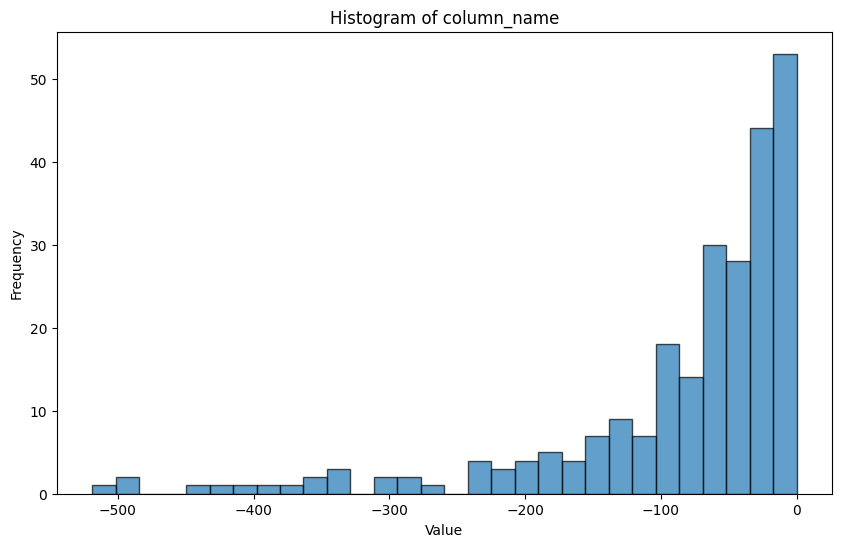

In [21]:
import matplotlib.pyplot as plt

# Replace 'column_name' with your numeric column
plt.figure(figsize=(10, 6))
plt.hist(year_2021['low-open'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of column_name')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


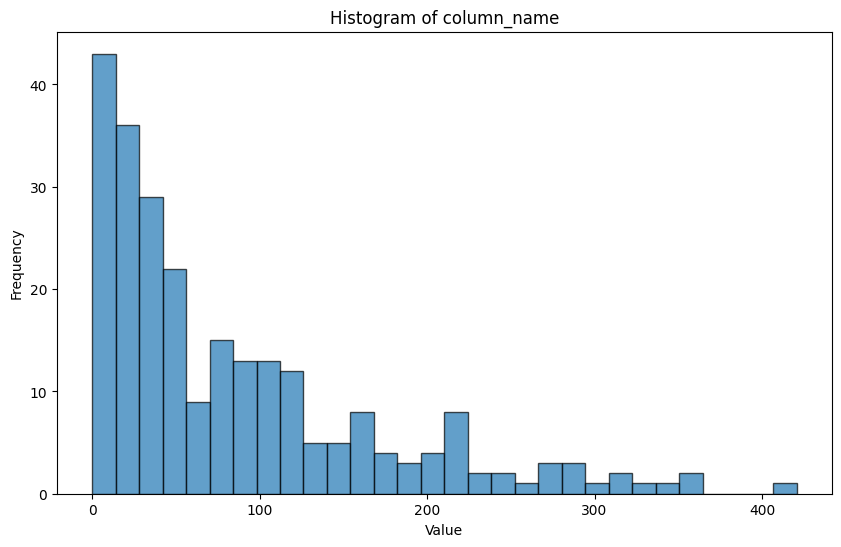

In [22]:
import matplotlib.pyplot as plt

# Replace 'column_name' with your numeric column
plt.figure(figsize=(10, 6))
plt.hist(year_2021['high-open'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of column_name')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


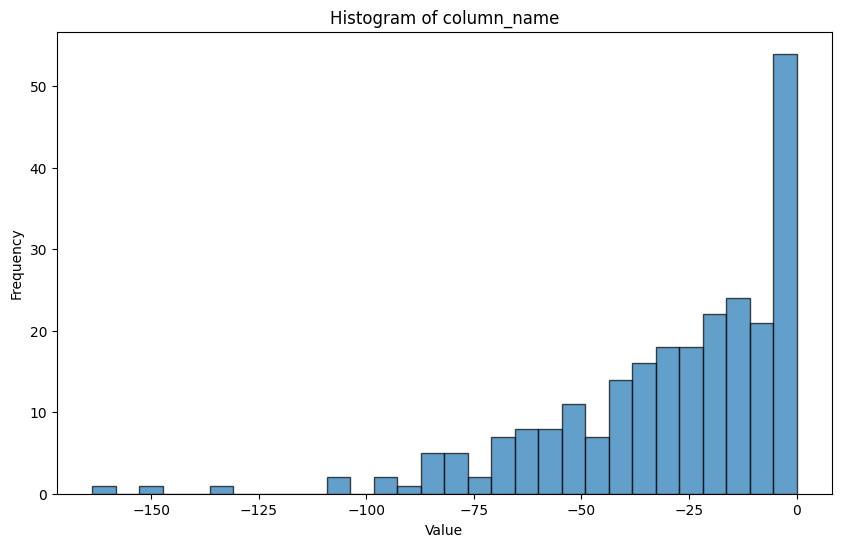

In [81]:
import matplotlib.pyplot as plt

# Replace 'column_name' with your numeric column
plt.figure(figsize=(10, 6))
plt.hist(year_2022['low-open'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of column_name')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

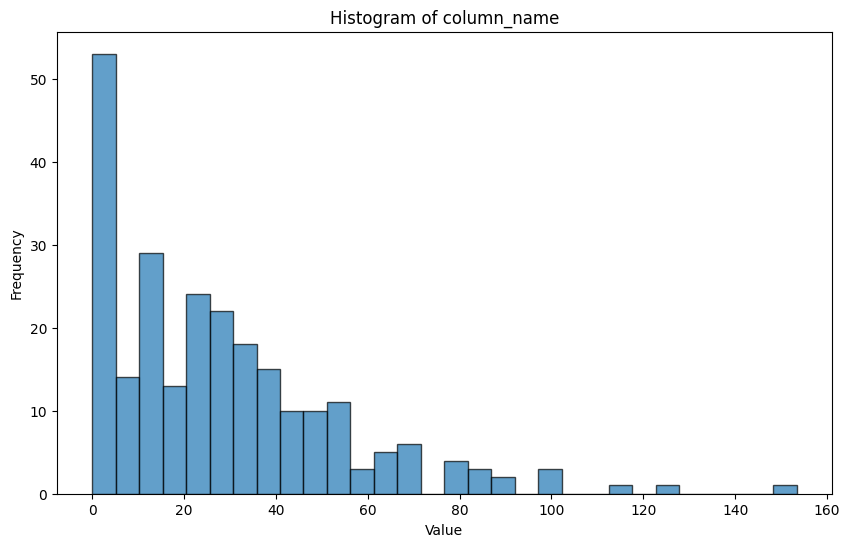

In [82]:
import matplotlib.pyplot as plt

# Replace 'column_name' with your numeric column
plt.figure(figsize=(10, 6))
plt.hist(year_2022['high-open'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of column_name')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


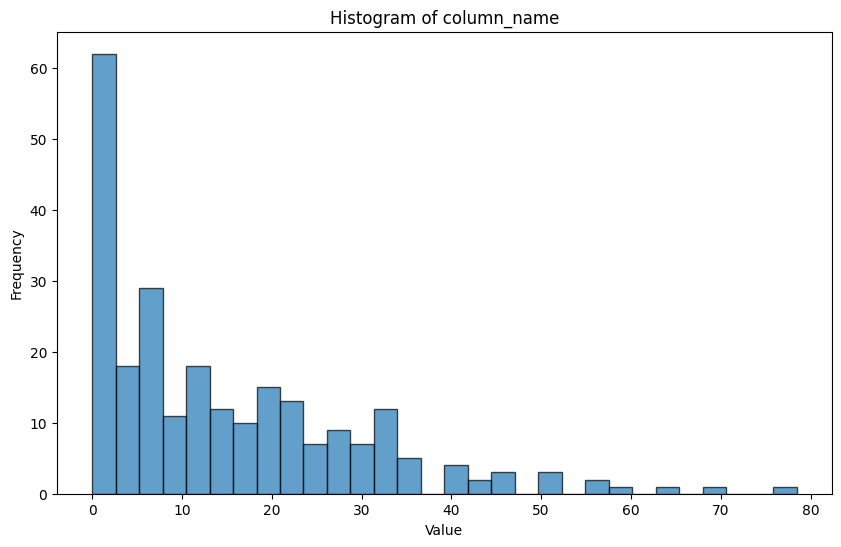

In [83]:
import matplotlib.pyplot as plt

# Replace 'column_name' with your numeric column
plt.figure(figsize=(10, 6))
plt.hist(year_2023['high-open'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of column_name')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Replace 'column_name' with your numeric column
plt.figure(figsize=(10, 6))
plt.hist(year_2023['low-open'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of low-open')  # Update title
plt.xlabel('Value')
plt.ylabel('Frequency')

# Save the figure as a JPG file
plt.savefig('histogram_low_open.jpg', format='jpg', dpi=300)

# Show the plot
plt.show()


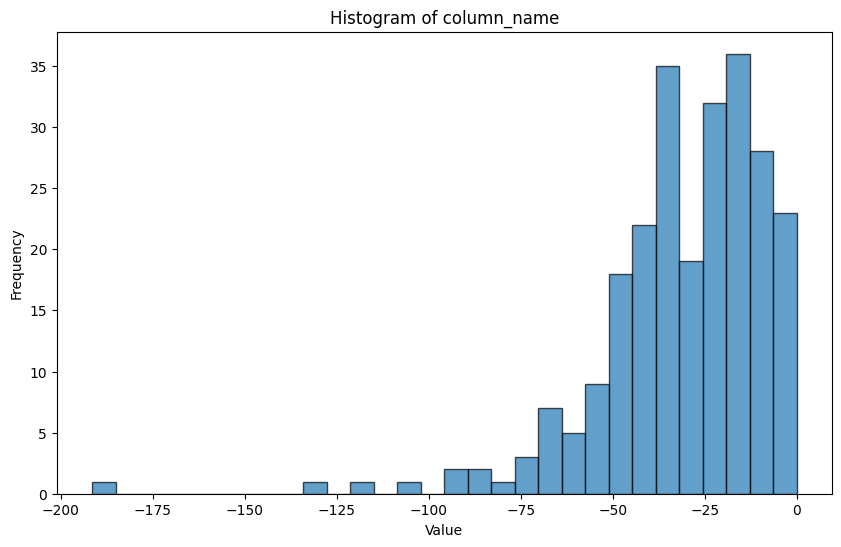

In [84]:
import matplotlib.pyplot as plt

# Replace 'column_name' with your numeric column
plt.figure(figsize=(10, 6))
plt.hist(year_2023['low-open'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of column_name')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
year_2024.value_counts

In [59]:
print(year_2021['trend'].value_counts())
print(year_2022['trend'].value_counts())
print(year_2023['trend'].value_counts())
print(year_2024['trend'].value_counts())

trend
UP      133
DOWN    115
Name: count, dtype: int64
trend
DOWN    128
UP      120
Name: count, dtype: int64
trend
UP      159
DOWN     87
Name: count, dtype: int64
trend
UP      101
DOWN     63
Name: count, dtype: int64


In [63]:
# Create a dictionary to hold the DataFrames for each month
monthly_data = {}

# Loop through each month from 1 to 12
for year in range(2021, 2025):
    for month in range(1, 13):
        monthly_data[f'{year}_{month}'] = df_5_min[(df_5_min['year'] == year) & (df_5_min['month'] == month)]

In [65]:
for month in range(1, 13):
    for year in range(2021, 2025):
        print(f'{year}---{month}')
        print(df_5_min[(df_5_min['year'] == year) & (df_5_min['month'] == month)]['trend'].value_counts())

2021---1
trend
UP      13
DOWN     7
Name: count, dtype: int64
2022---1
trend
DOWN    10
UP      10
Name: count, dtype: int64
2023---1
trend
UP      19
DOWN     2
Name: count, dtype: int64
2024---1
trend
UP      13
DOWN     9
Name: count, dtype: int64
2021---2
trend
DOWN    11
UP       9
Name: count, dtype: int64
2022---2
trend
UP      10
DOWN    10
Name: count, dtype: int64
2023---2
trend
UP      15
DOWN     5
Name: count, dtype: int64
2024---2
trend
UP      16
DOWN     5
Name: count, dtype: int64
2021---3
trend
UP      14
DOWN     7
Name: count, dtype: int64
2022---3
trend
UP      11
DOWN    10
Name: count, dtype: int64
2023---3
trend
DOWN    12
UP       9
Name: count, dtype: int64
2024---3
trend
DOWN    12
UP       7
Name: count, dtype: int64
2021---4
trend
DOWN    11
UP       8
Name: count, dtype: int64
2022---4
trend
DOWN    10
UP       9
Name: count, dtype: int64
2023---4
trend
UP      13
DOWN     4
Name: count, dtype: int64
2024---4
trend
UP      13
DOWN     7
Name: count, dtype

In [19]:
year_2024 = df_5_min[df_5_min['year']==2024]['my_candle'].value_counts()

In [66]:
for year in range(2021, 2025):
    for month in range(1, 13):
        print(f'{year}---{month}')
        print(df_5_min[(df_5_min['year'] == year) & (df_5_min['month'] == month)]['trend'].value_counts())

2021---1
trend
UP      13
DOWN     7
Name: count, dtype: int64
2021---2
trend
DOWN    11
UP       9
Name: count, dtype: int64
2021---3
trend
UP      14
DOWN     7
Name: count, dtype: int64
2021---4
trend
DOWN    11
UP       8
Name: count, dtype: int64
2021---5
trend
DOWN    12
UP       8
Name: count, dtype: int64
2021---6
trend
UP      14
DOWN     8
Name: count, dtype: int64
2021---7
trend
UP      13
DOWN     8
Name: count, dtype: int64
2021---8
trend
DOWN    11
UP      10
Name: count, dtype: int64
2021---9
trend
DOWN    11
UP      10
Name: count, dtype: int64
2021---10
trend
UP      12
DOWN     8
Name: count, dtype: int64
2021---11
trend
UP      11
DOWN     9
Name: count, dtype: int64
2021---12
trend
DOWN    12
UP      11
Name: count, dtype: int64
2022---1
trend
DOWN    10
UP      10
Name: count, dtype: int64
2022---2
trend
UP      10
DOWN    10
Name: count, dtype: int64
2022---3
trend
UP      11
DOWN    10
Name: count, dtype: int64
2022---4
trend
DOWN    10
UP       9
Name: count, dt

In [68]:
for year in range(2021, 2025):
    for month in range(1, 13):
        print(f'{year}---{month}')
        print(df_5_min[(df_5_min['year'] == year) & (df_5_min['month'] == month)]['trend'].value_counts())

2021---1
trend
UP      13
DOWN     7
Name: count, dtype: int64
2021---2
trend
DOWN    11
UP       9
Name: count, dtype: int64
2021---3
trend
UP      14
DOWN     7
Name: count, dtype: int64
2021---4
trend
DOWN    11
UP       8
Name: count, dtype: int64
2021---5
trend
DOWN    12
UP       8
Name: count, dtype: int64
2021---6
trend
UP      14
DOWN     8
Name: count, dtype: int64
2021---7
trend
UP      13
DOWN     8
Name: count, dtype: int64
2021---8
trend
DOWN    11
UP      10
Name: count, dtype: int64
2021---9
trend
DOWN    11
UP      10
Name: count, dtype: int64
2021---10
trend
UP      12
DOWN     8
Name: count, dtype: int64
2021---11
trend
UP      11
DOWN     9
Name: count, dtype: int64
2021---12
trend
DOWN    12
UP      11
Name: count, dtype: int64
2022---1
trend
DOWN    10
UP      10
Name: count, dtype: int64
2022---2
trend
UP      10
DOWN    10
Name: count, dtype: int64
2022---3
trend
UP      11
DOWN    10
Name: count, dtype: int64
2022---4
trend
DOWN    10
UP       9
Name: count, dt

In [26]:
# df_5 = pd.read_csv('../nifty_ohlc/nifty_5m_august_2024.csv')
# df_5



In [21]:
import statistics

In [22]:
data = list(year_2024.keys())

mean_value = statistics.mean(data)

# Median
median_value = statistics.median(data)

# Mode
mode_value = statistics.mode(data)


In [23]:
mean_value

-39.411217948717955

In [24]:
median_value

-33.774999999999636

In [25]:
mode_value

0.0

In [26]:
data.sort()

In [27]:
len(data)

156

In [28]:
import matplotlib.pyplot as plt

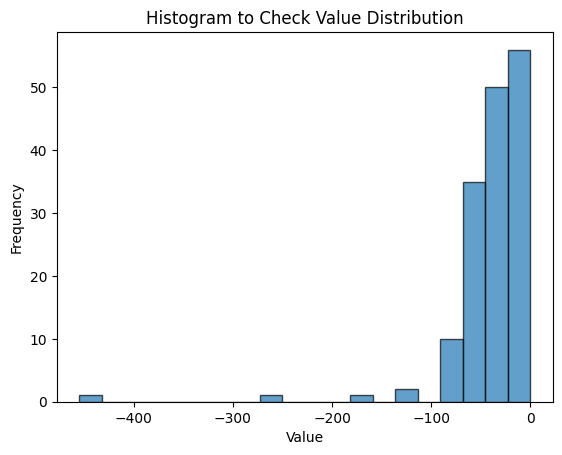

In [29]:
plt.hist(data, bins=20, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram to Check Value Distribution')

# Show the plot
plt.show()

In [30]:
filtered_data = list(filter(lambda x: x >= -100, data))

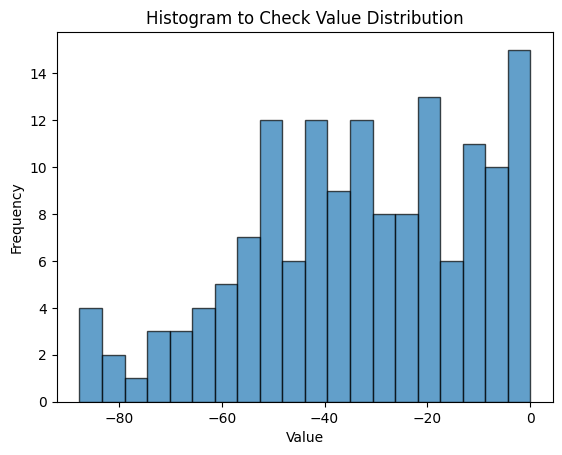

In [31]:
plt.hist(filtered_data, bins=20, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram to Check Value Distribution')

# Show the plot
plt.show()

In [32]:
data

[-454.7000000000007,
 -254.20000000000073,
 -176.09999999999854,
 -127.75,
 -113.95000000000073,
 -87.64999999999782,
 -84.65000000000146,
 -84.40000000000146,
 -83.45000000000073,
 -82.10000000000218,
 -81.04999999999927,
 -76.25,
 -74.10000000000218,
 -71.85000000000218,
 -70.94999999999709,
 -66.64999999999782,
 -66.45000000000073,
 -66.0,
 -65.04999999999927,
 -64.09999999999854,
 -62.54999999999927,
 -62.25,
 -60.79999999999927,
 -60.20000000000073,
 -59.29999999999927,
 -58.39999999999782,
 -57.19999999999709,
 -56.54999999999927,
 -56.349999999998545,
 -55.79999999999927,
 -54.69999999999709,
 -54.150000000001455,
 -53.5,
 -53.0,
 -52.25,
 -52.20000000000073,
 -52.19999999999709,
 -52.0,
 -51.80000000000291,
 -51.70000000000073,
 -51.29999999999927,
 -50.79999999999927,
 -50.10000000000218,
 -50.0,
 -49.0,
 -48.5,
 -48.04999999999927,
 -46.35000000000218,
 -46.25,
 -45.60000000000218,
 -45.400000000001455,
 -45.150000000001455,
 -42.60000000000218,
 -41.45000000000073,
 -41.2999

In [33]:
df_5_min

,high,low,open,close,year,month,day,hour,minute,candle_body,high_shadow,low_shadow,my_candle,trend,my_trend
2021-01-01,14019.50,13994.85,13996.10,14015.45,2021,1,1,9,15,-19.35,23.40,20.60,-1.25,DOWN,YES
2021-01-04,14106.40,14080.60,14104.35,14092.35,2021,1,4,9,15,12.00,2.05,11.75,-23.75,UP,YES
2021-01-05,14106.70,14050.15,14075.15,14106.70,2021,1,5,9,15,-31.55,31.55,56.55,-25.00,DOWN,YES
2021-01-06,14241.40,14207.25,14240.95,14229.65,2021,1,6,9,15,11.30,0.45,22.40,-33.70,UP,YES
2021-01-07,14253.75,14223.60,14253.75,14234.75,2021,1,7,9,15,19.00,0.00,11.15,-30.15,UP,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-22,24867.35,24821.95,24863.40,24826.05,2024,8,22,9,15,37.35,3.95,4.10,-41.45,UP,YES
2024-08-23,24858.40,24792.40,24845.40,24804.95,2024,8,23,9,15,40.45,13.00,12.55,-53.00,UP,YES
2024-08-26,24917.30,24874.70,24906.10,24887.45,2024,8,26,9,15,18.65,11.20,12.75,-31.40,UP,YES
2024-08-27,25037.70,24988.00,25024.80,25021.45,2024,8,27,9,15,3.35,12.90,33.45,-36.80,UP,YES


In [85]:
# Create a dictionary to hold the DataFrames for each month
monthly_data = {}

# Loop through each month from 1 to 12
for year in range(2021, 2025):
    for month in range(1, 13):
        monthly_data[f'{year}_{month}'] = df_5_min[(df_5_min['year'] == year) & (df_5_min['month'] == month)]

/tmp/ipykernel_2813/554530297.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


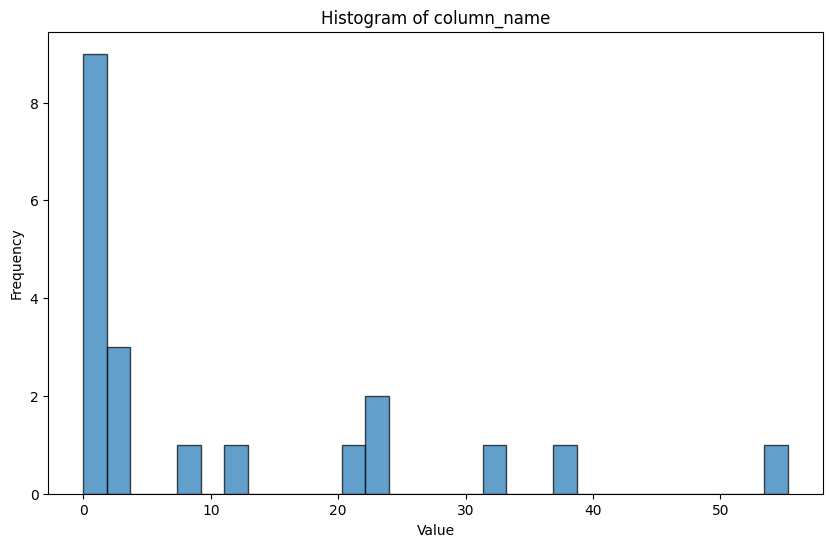

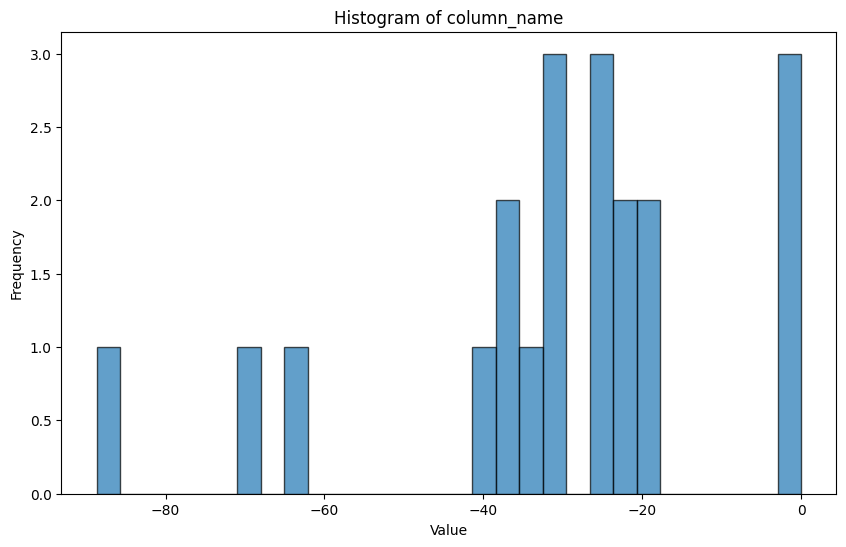

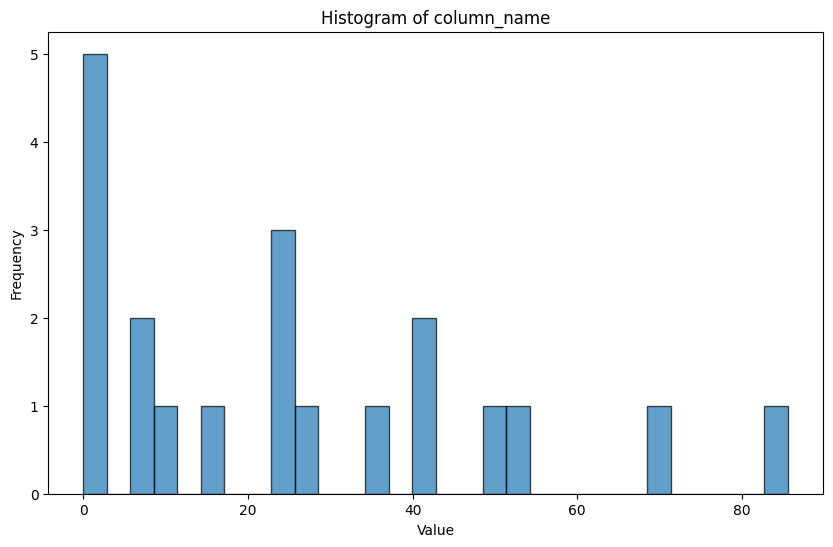

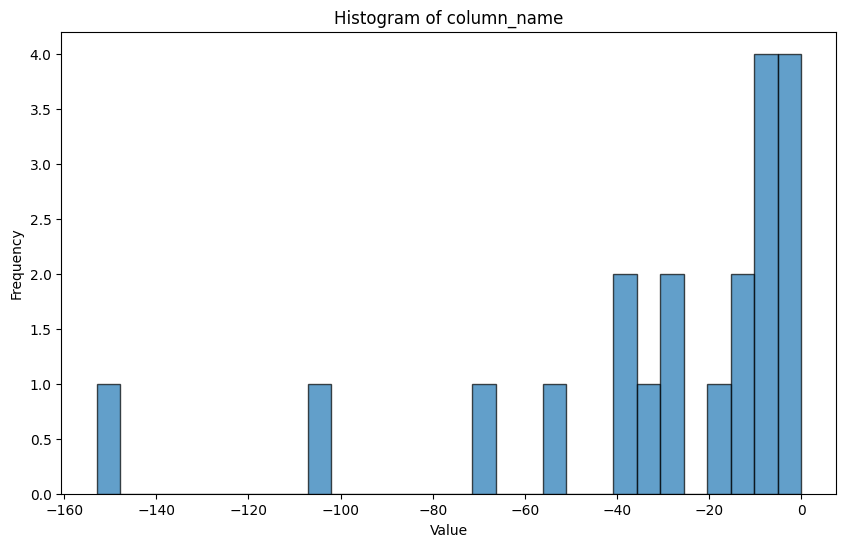

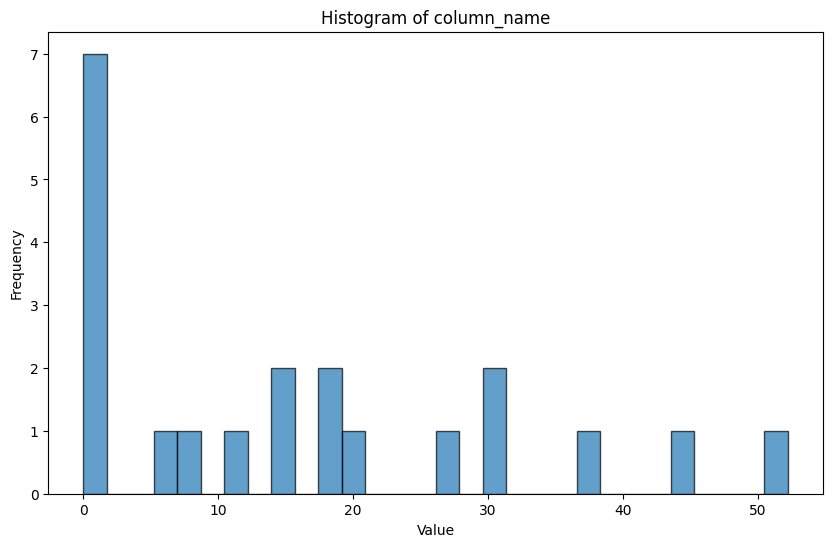

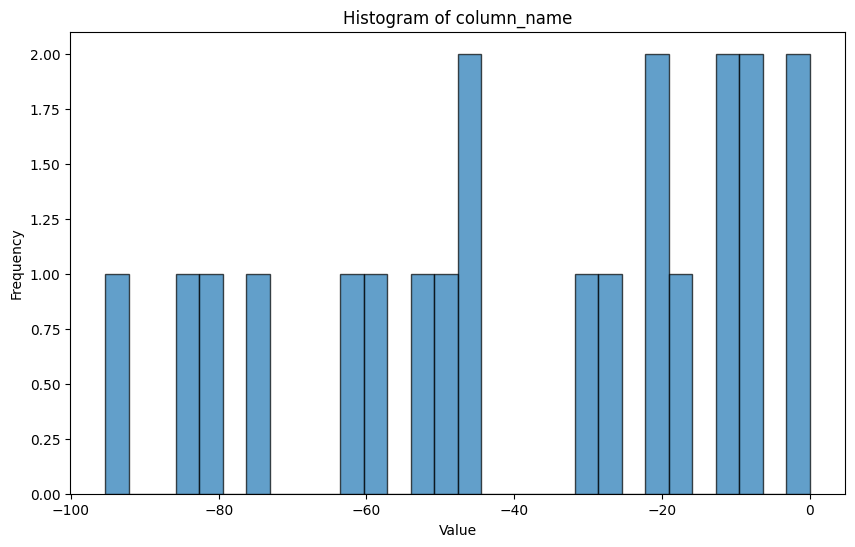

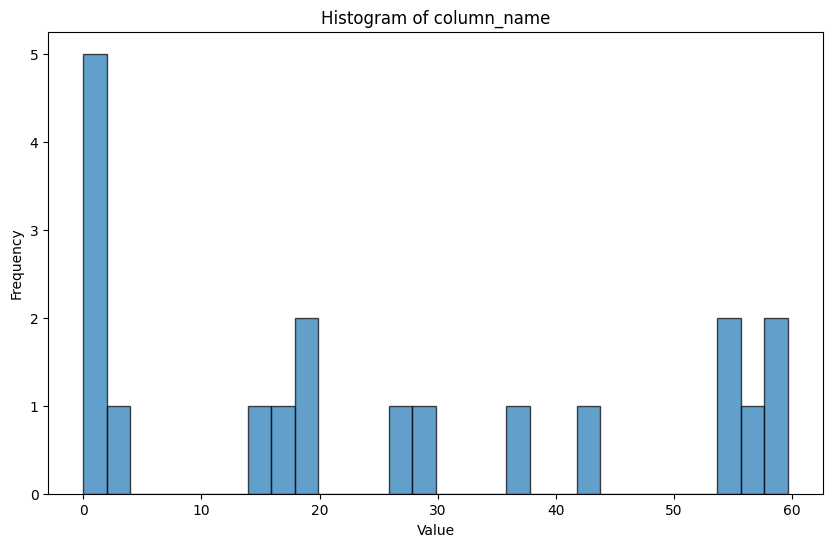

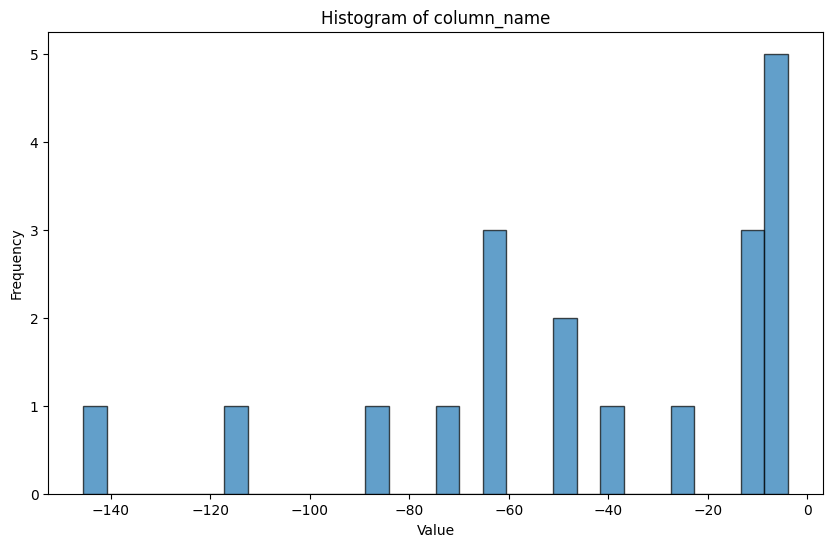

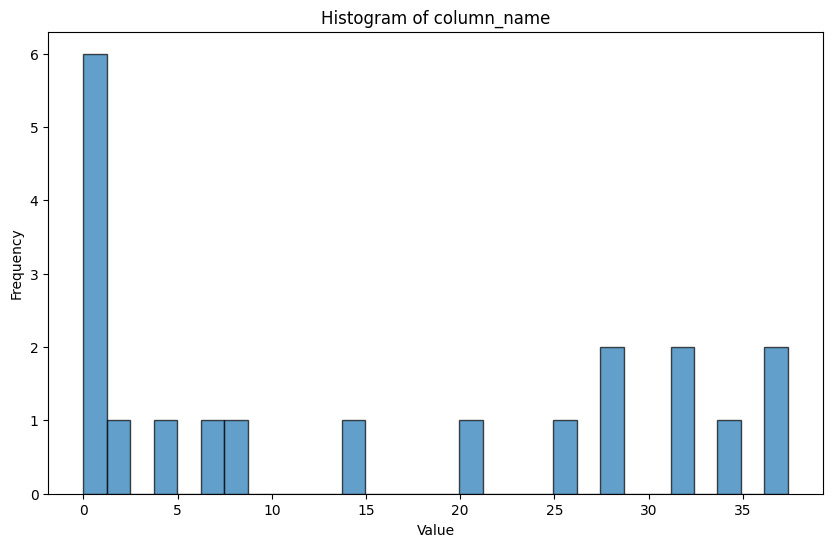

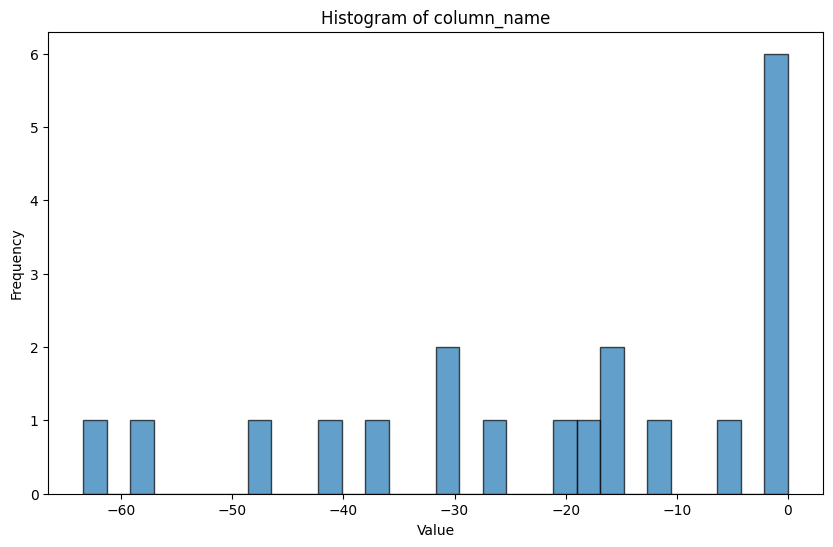

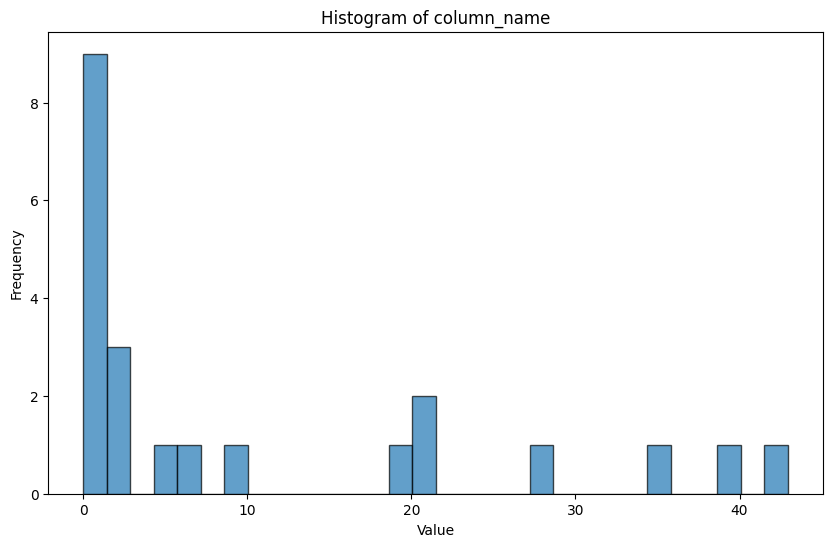

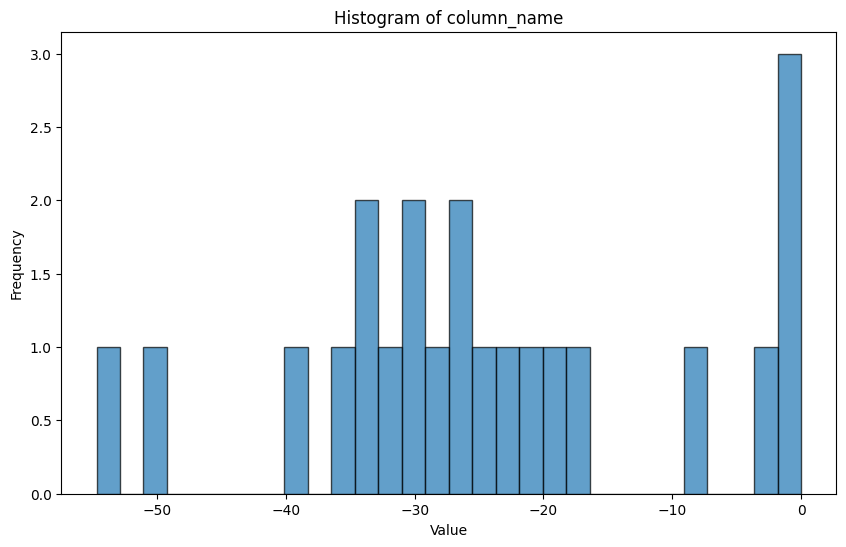

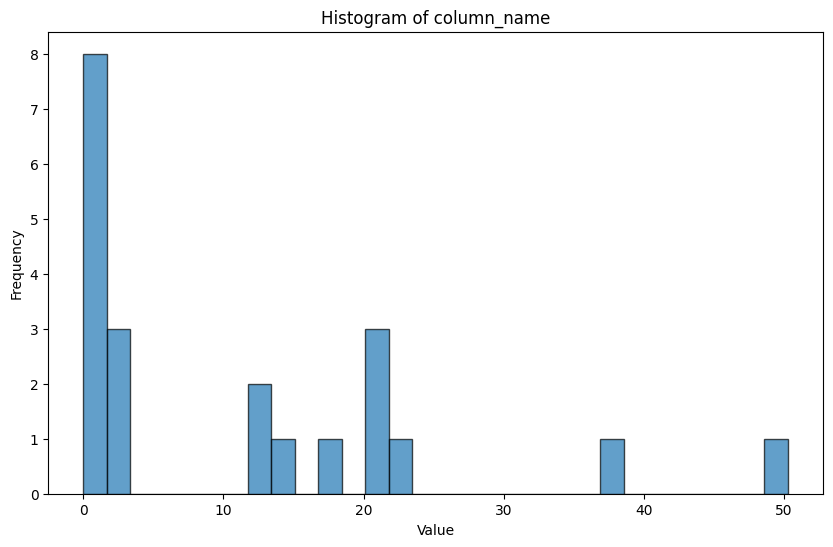

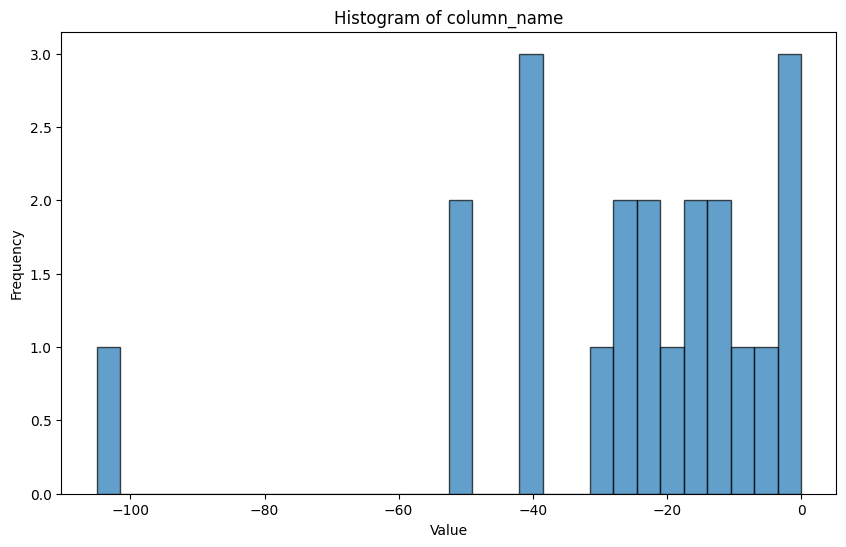

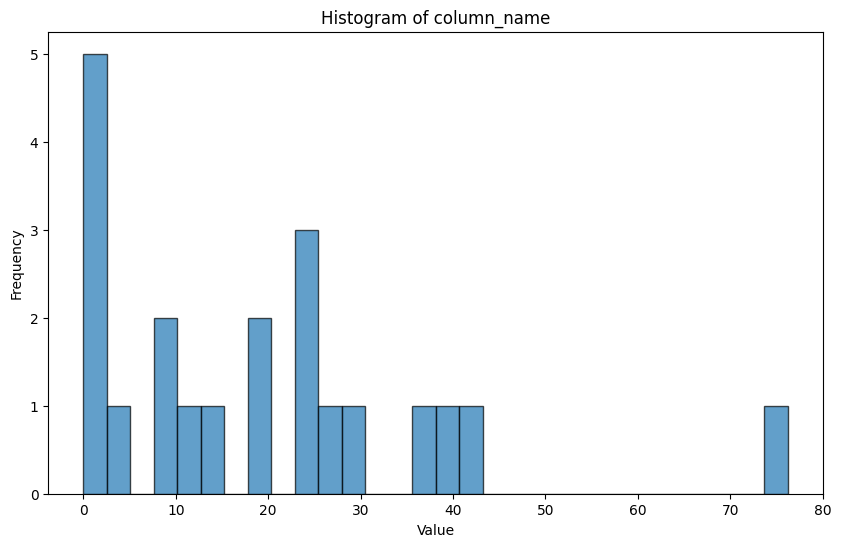

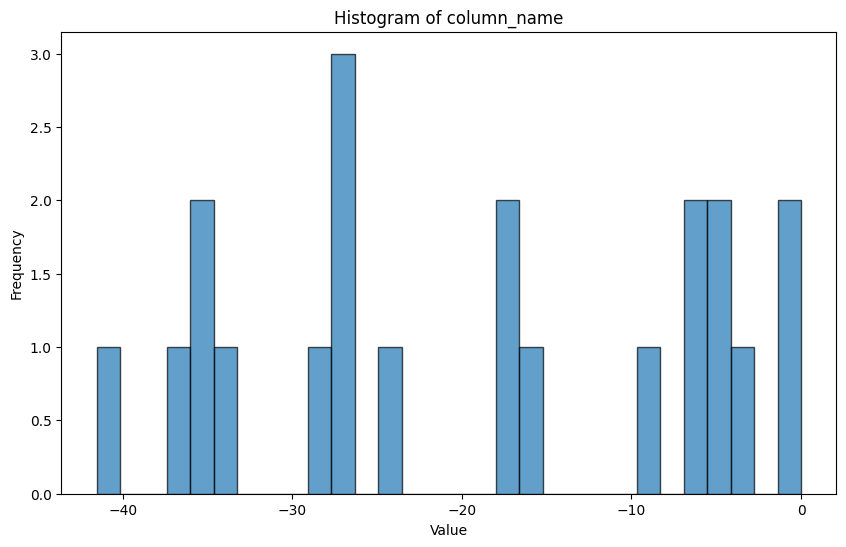

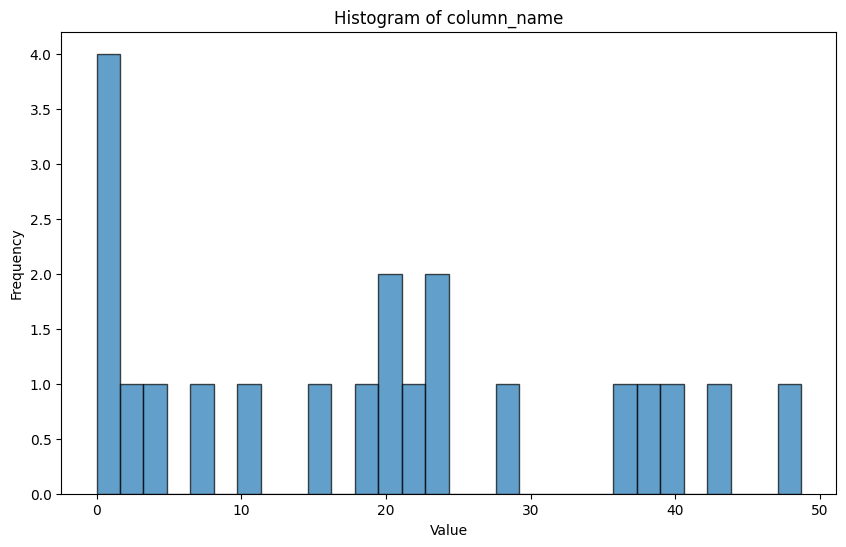

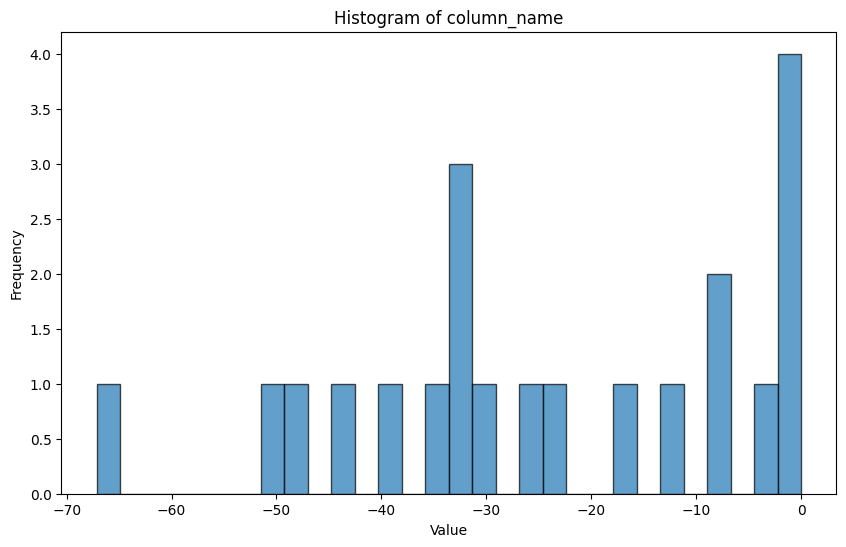

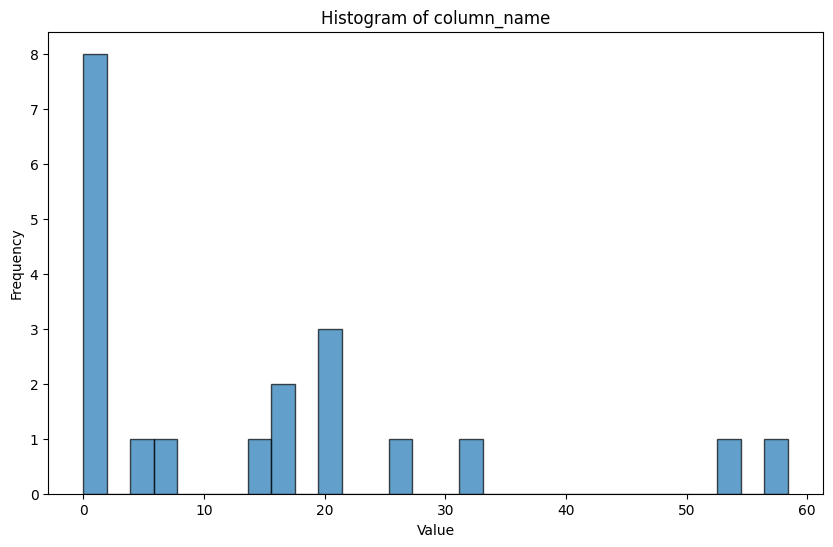

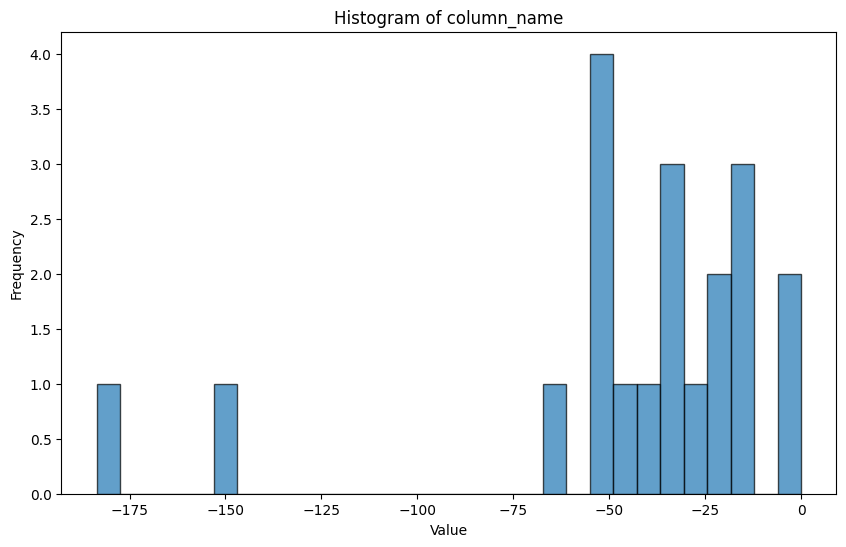

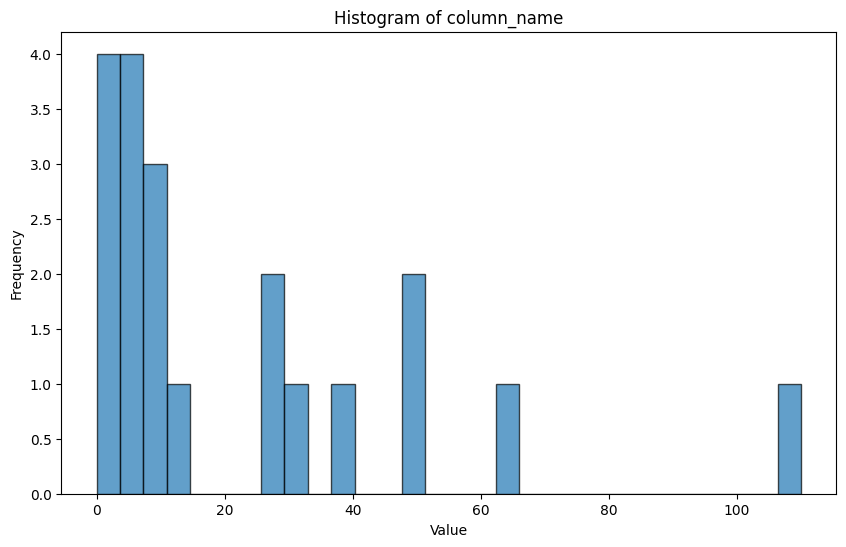

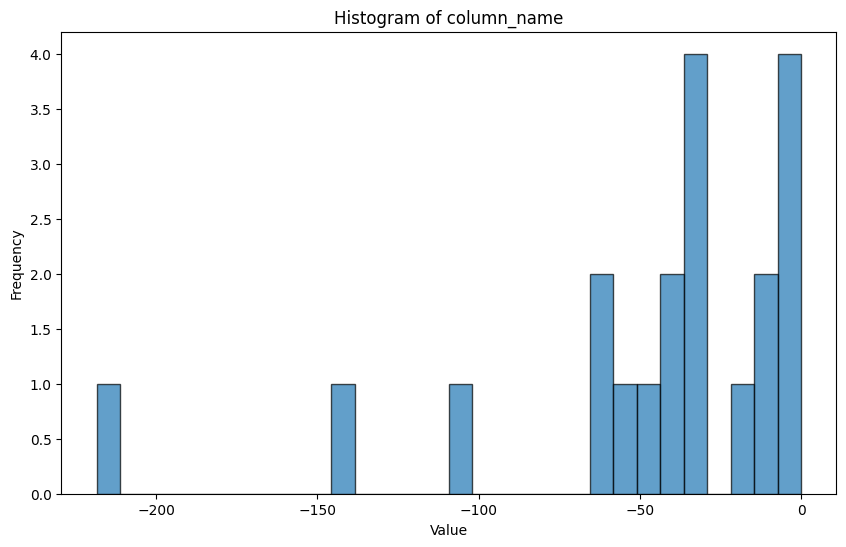

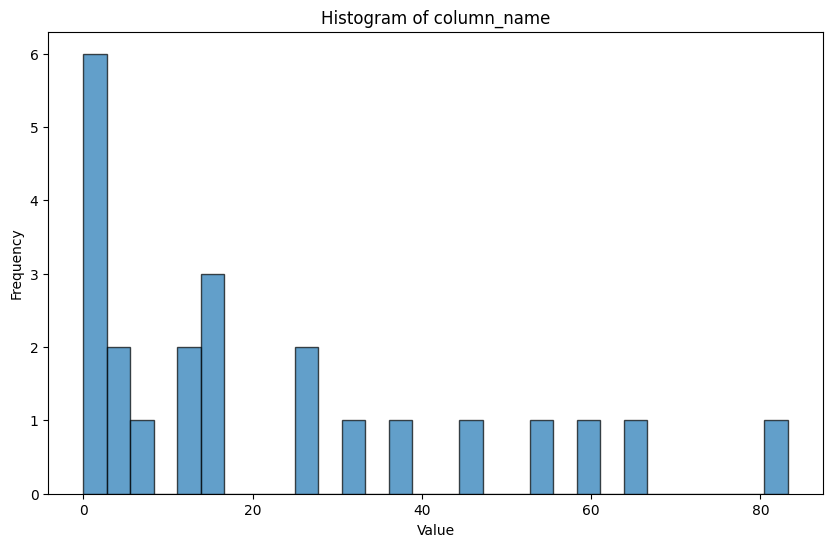

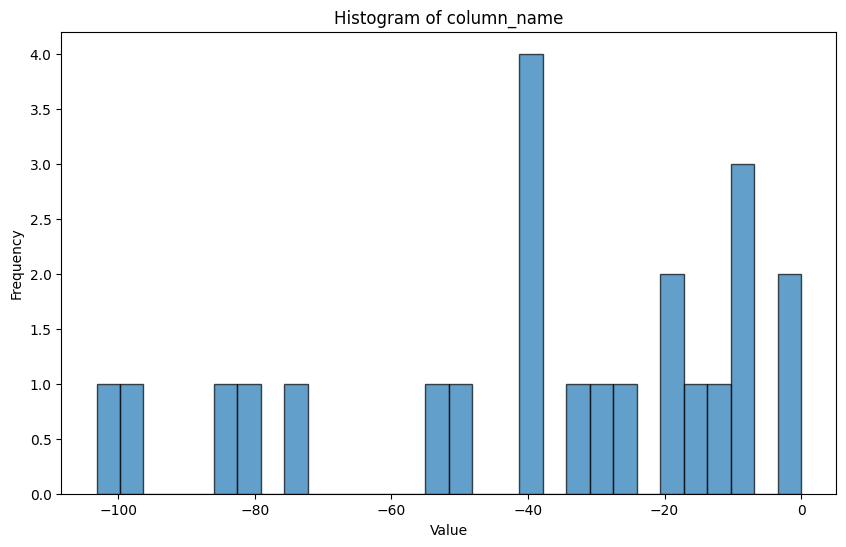

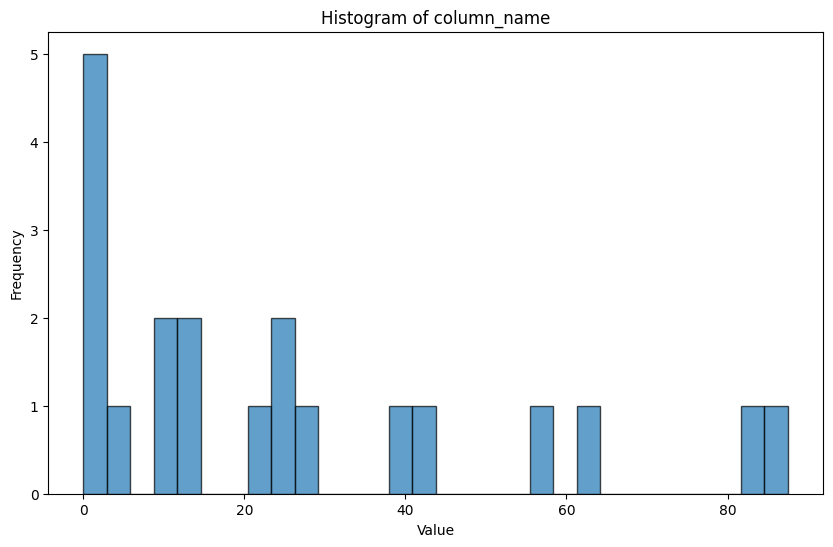

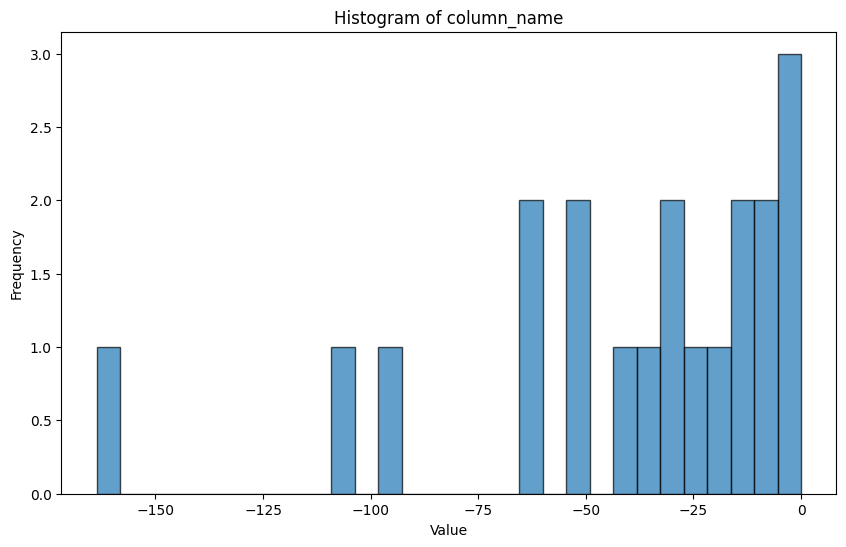

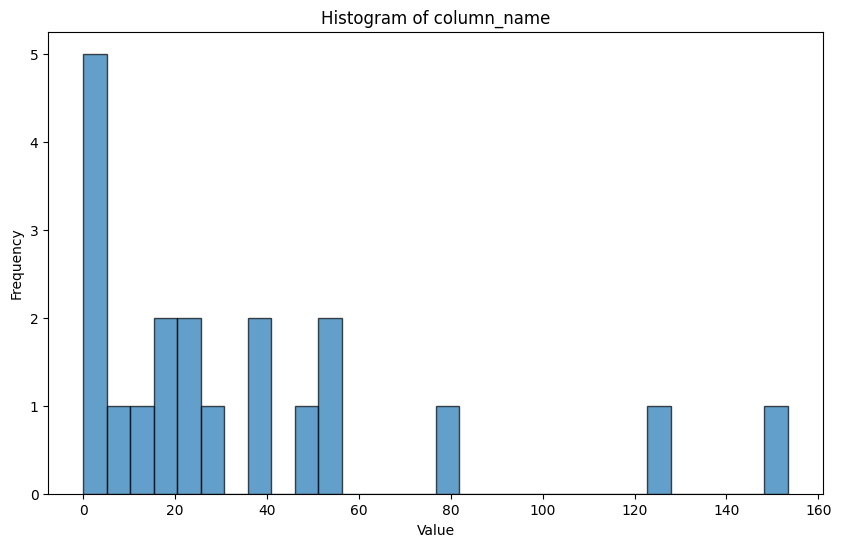

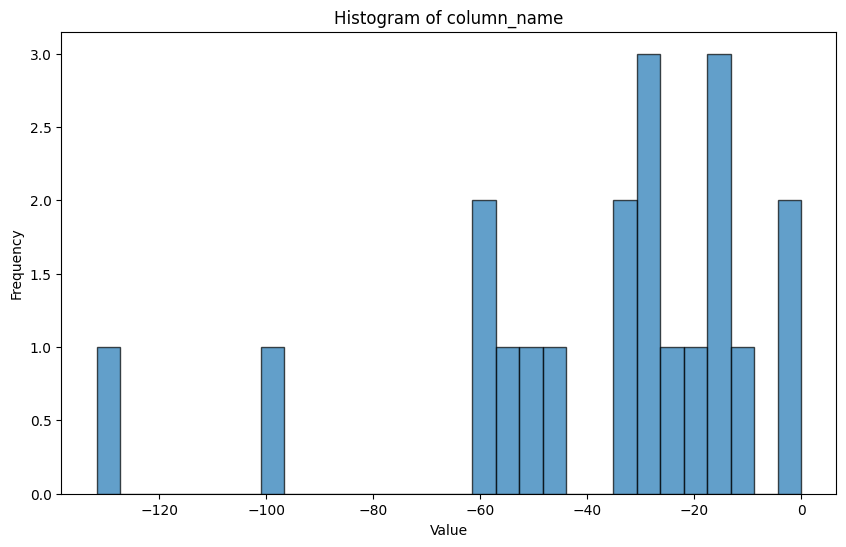

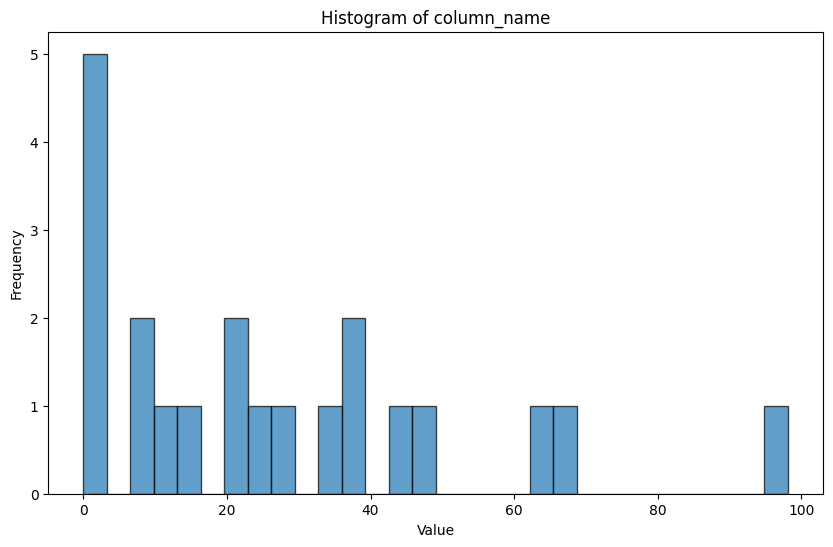

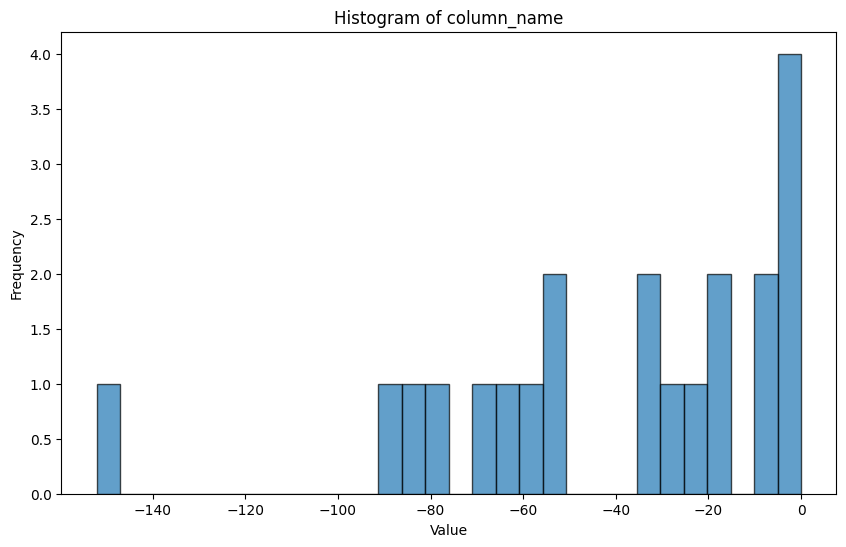

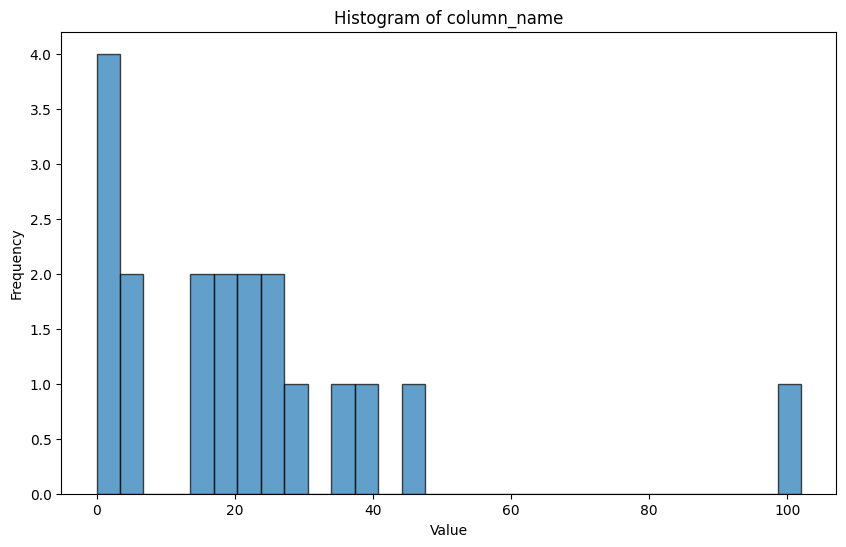

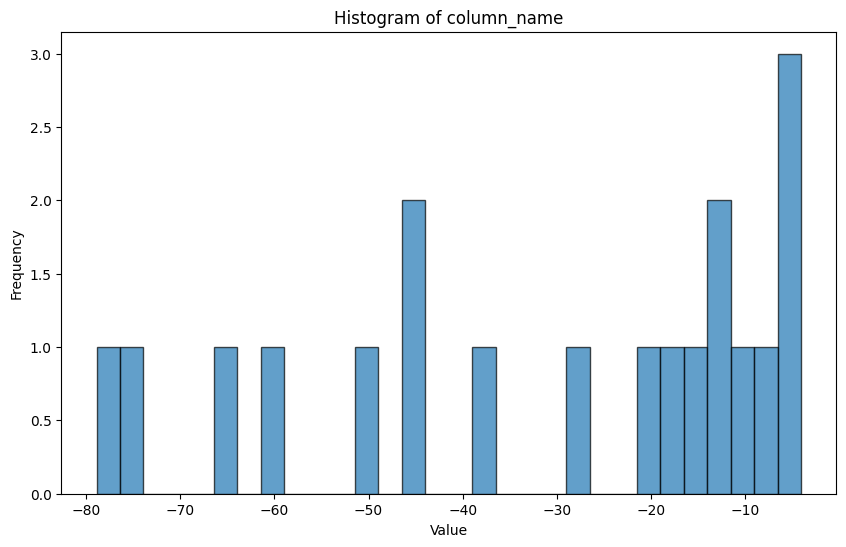

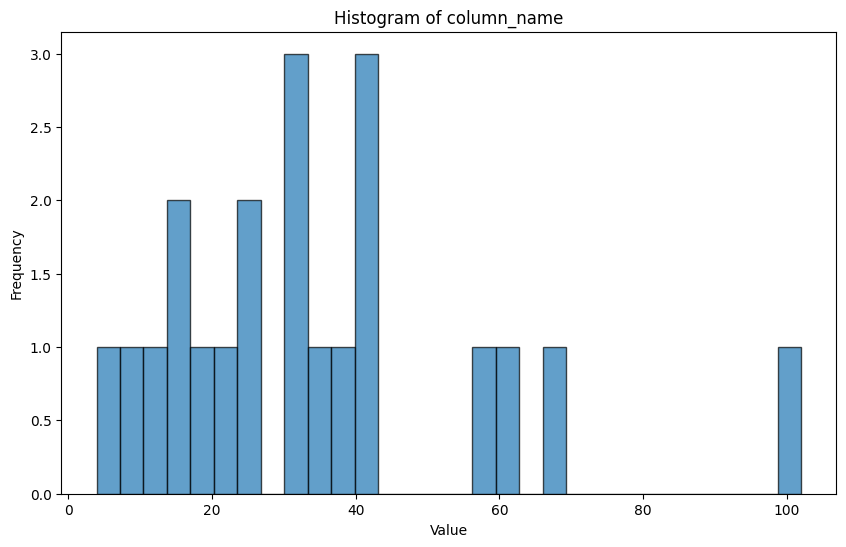

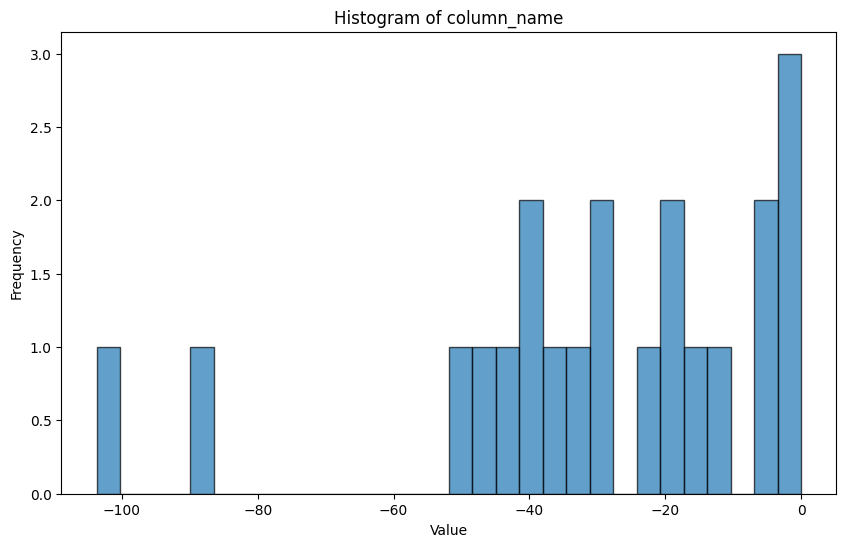

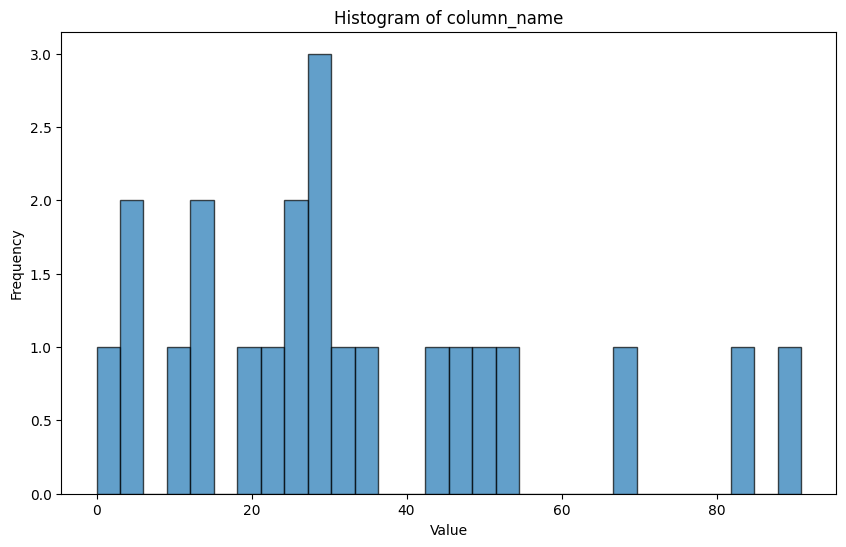

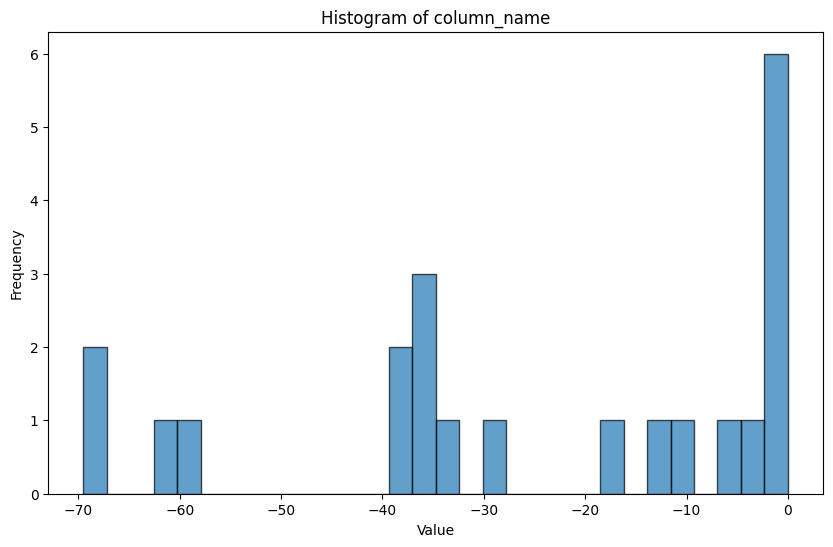

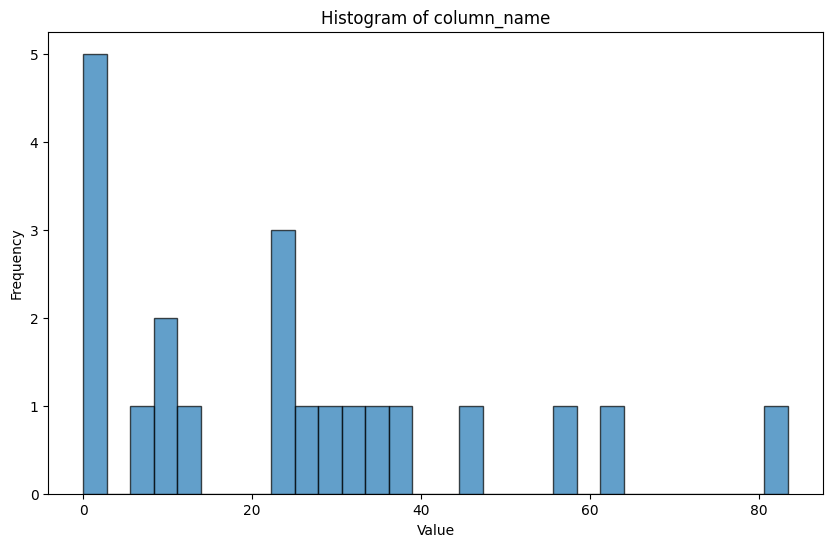

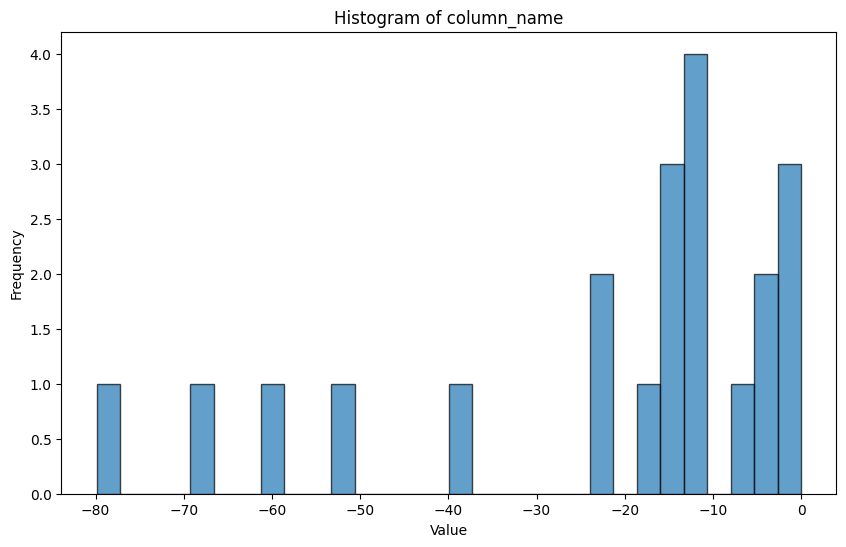

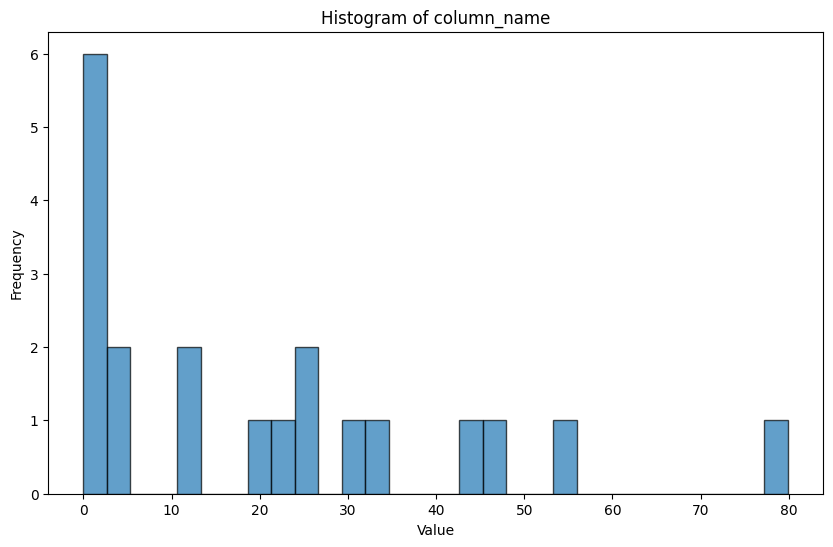

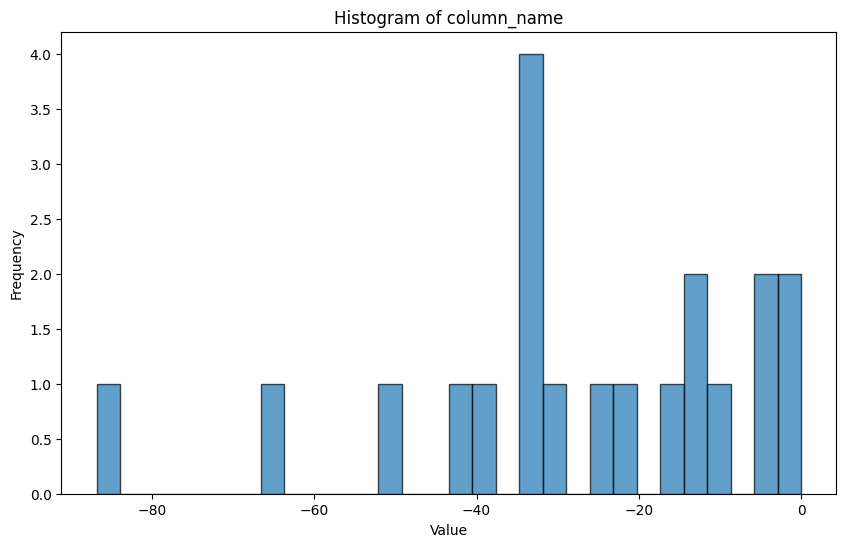

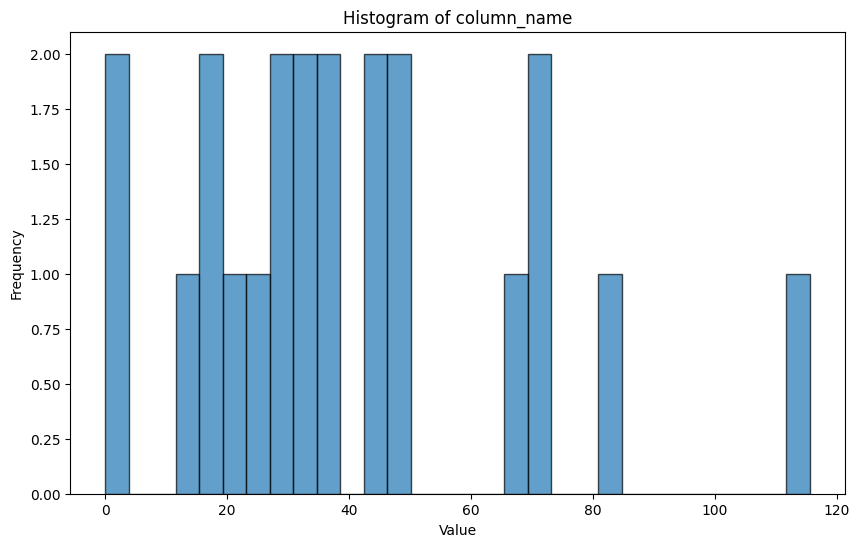

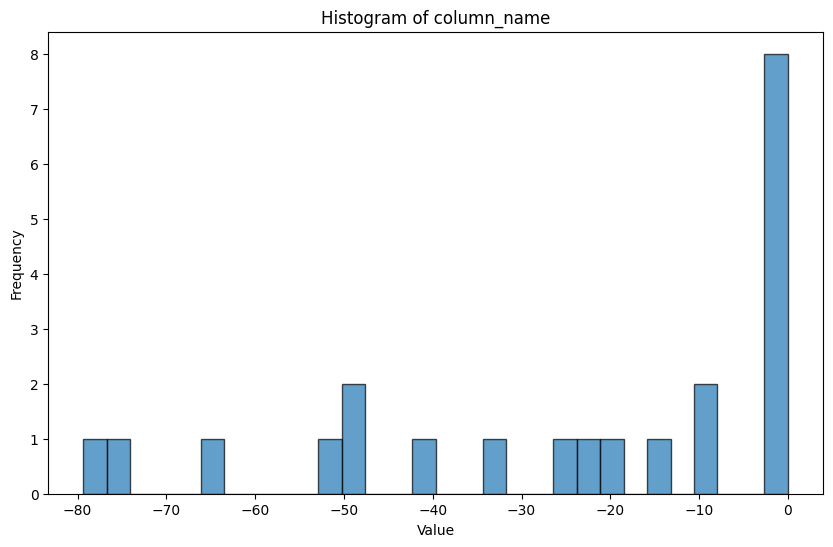

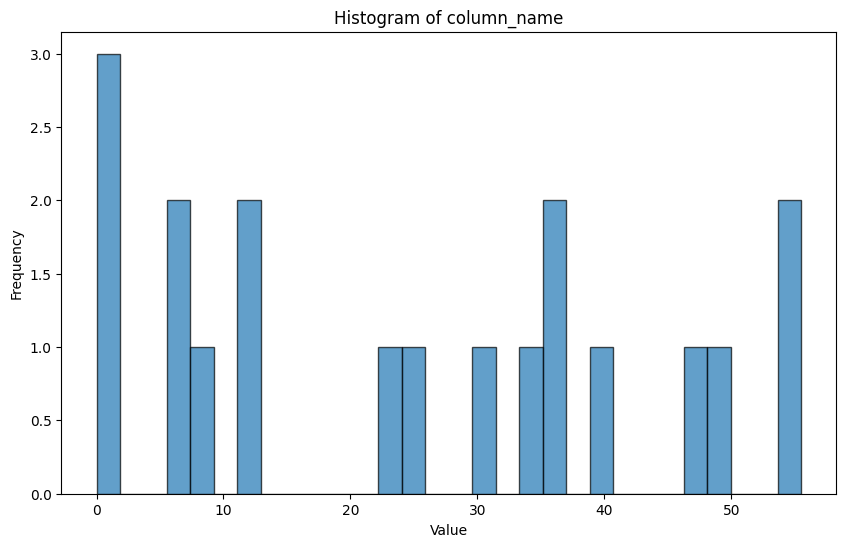

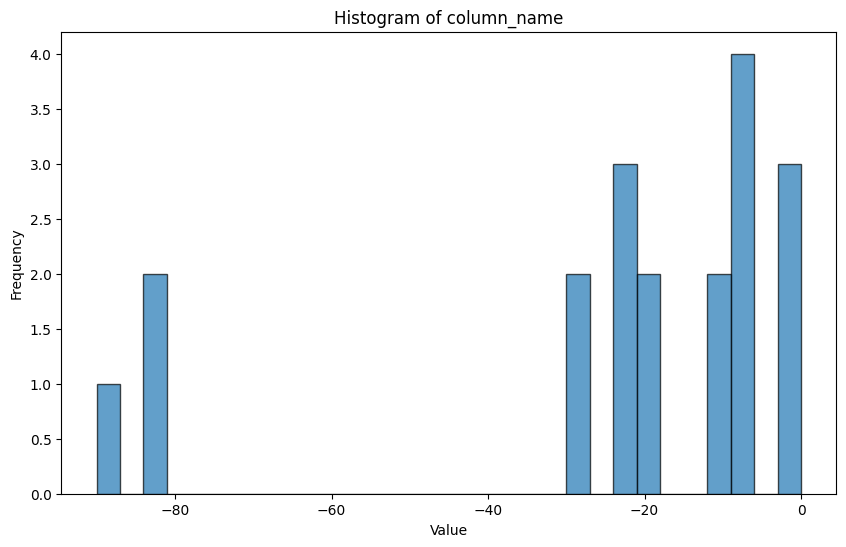

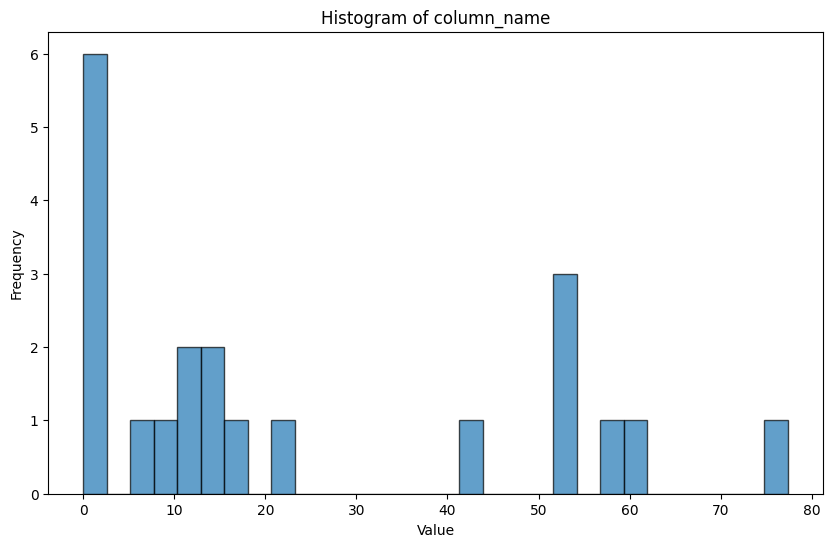

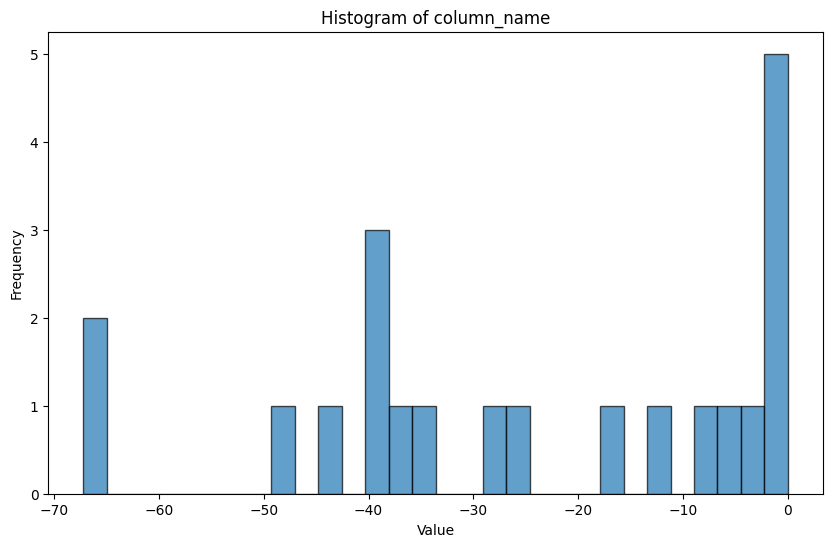

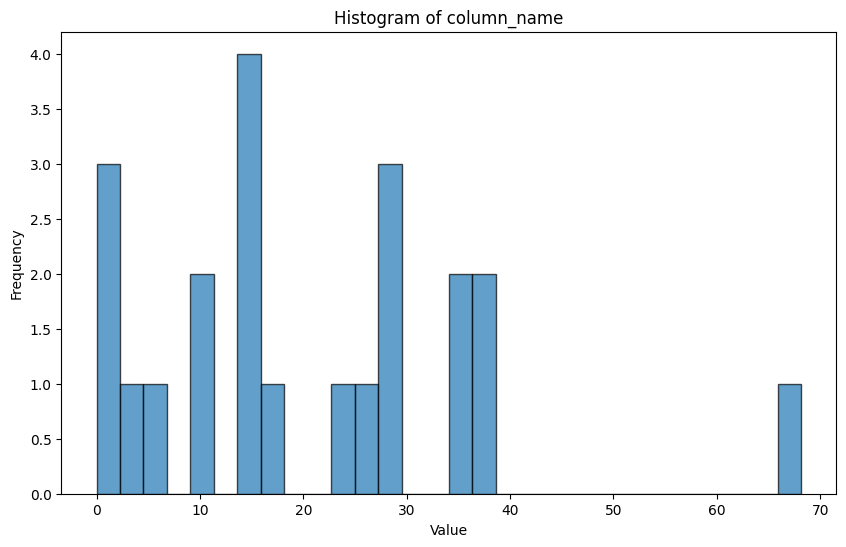

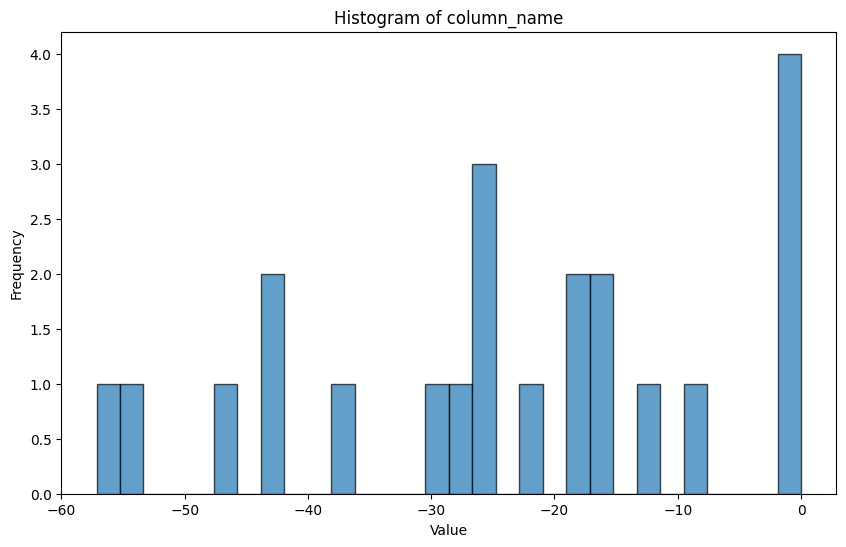

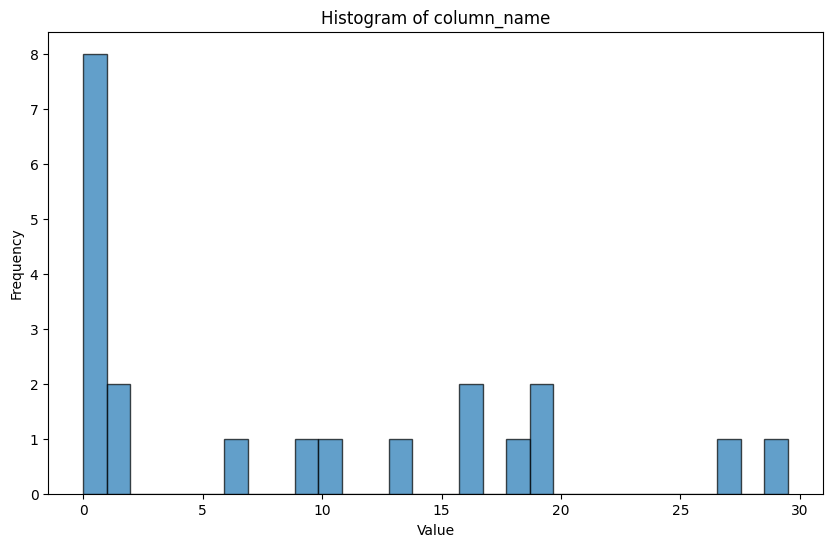

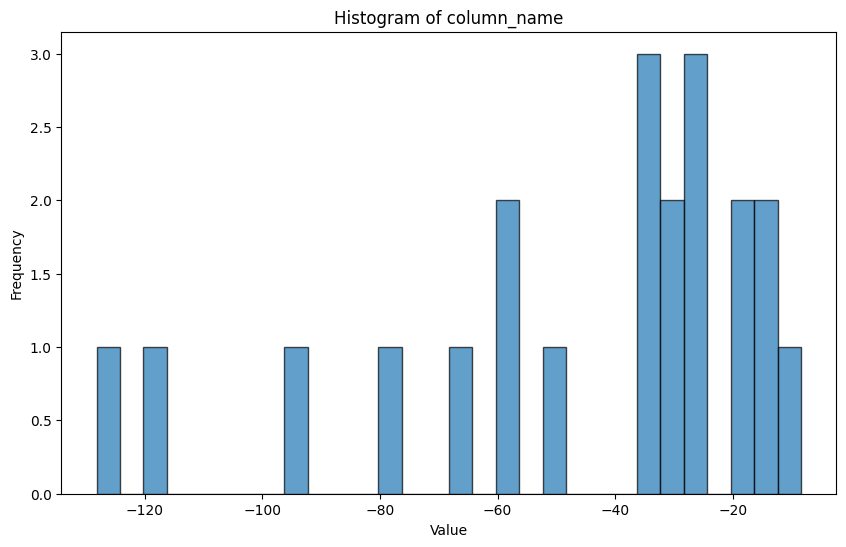

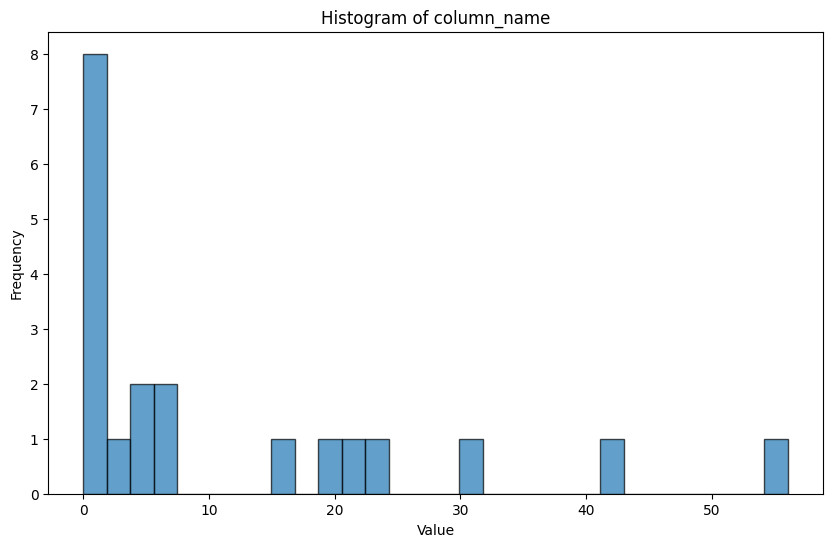

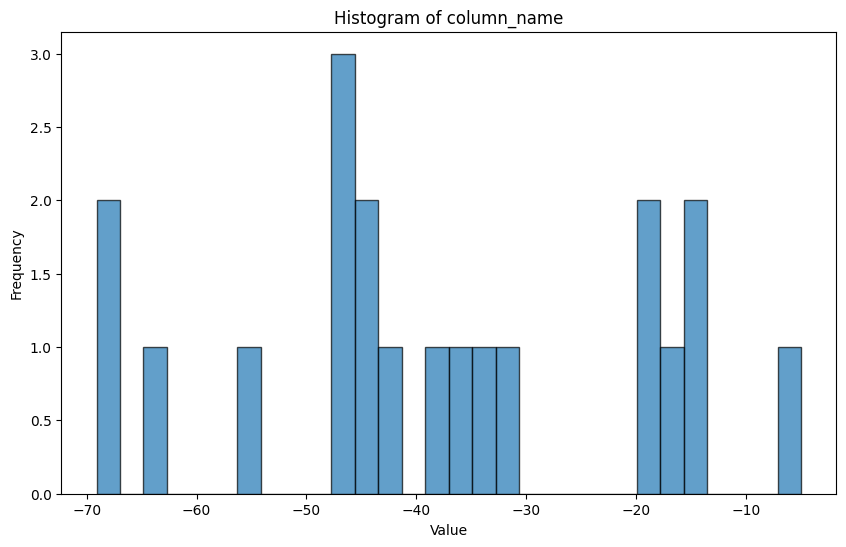

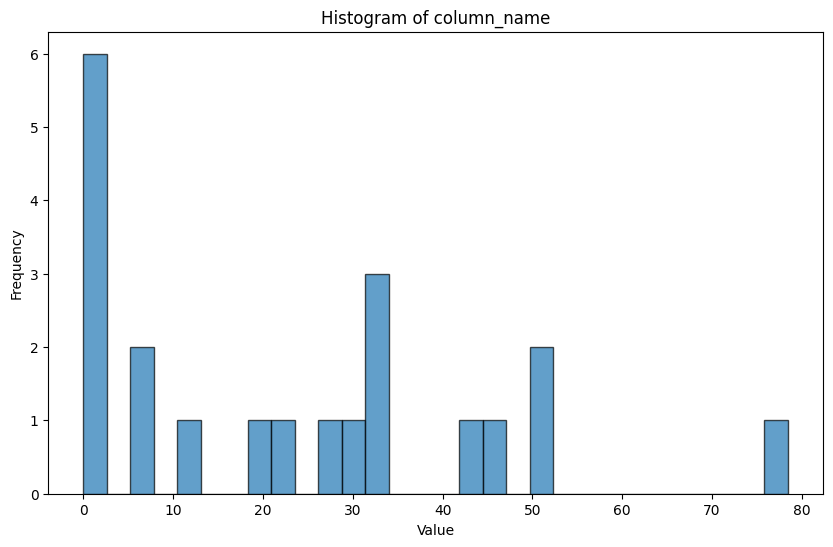

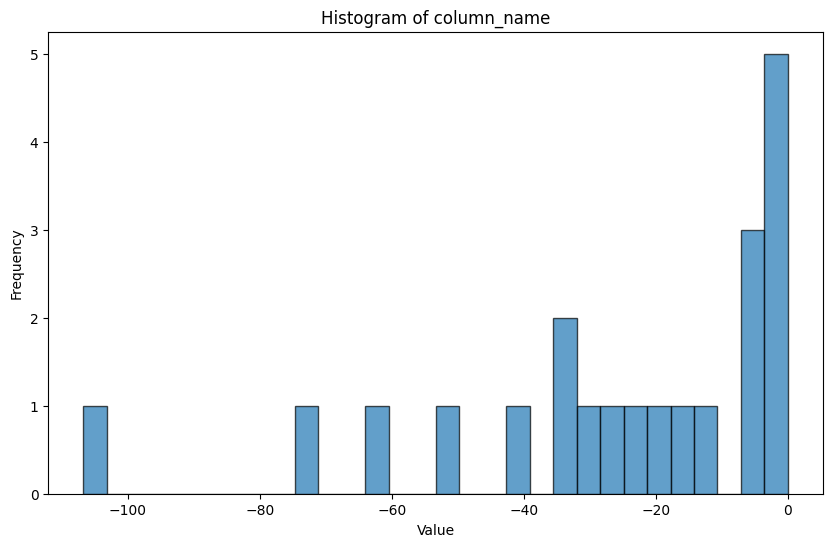

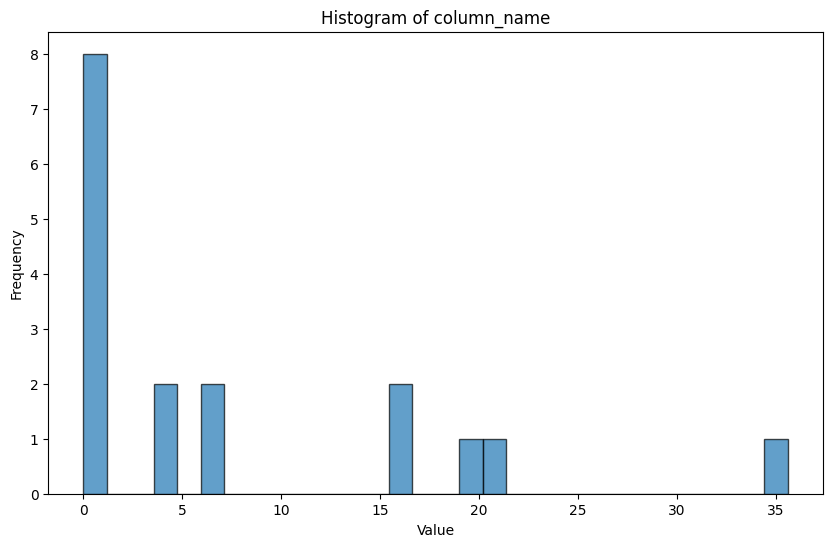

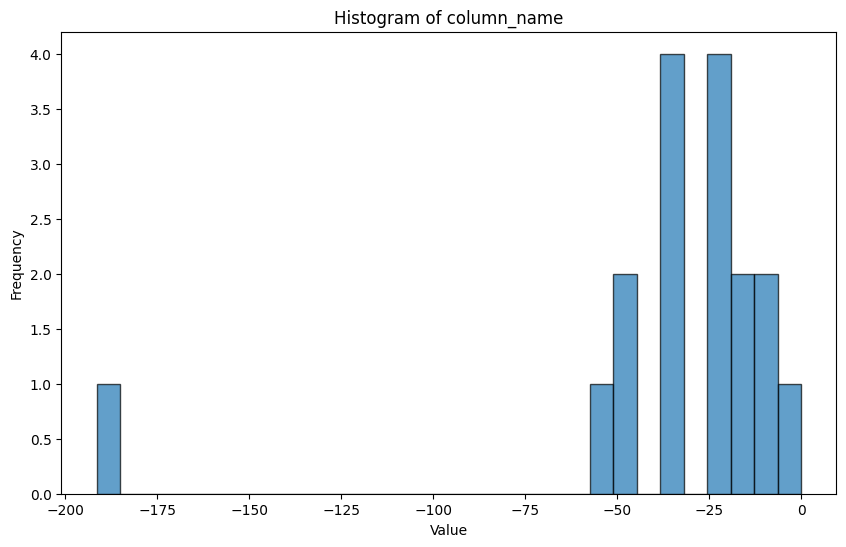

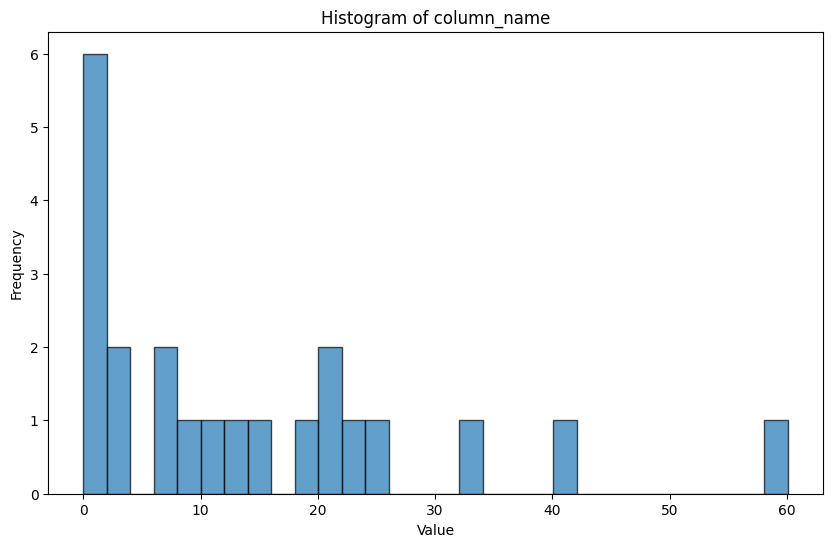

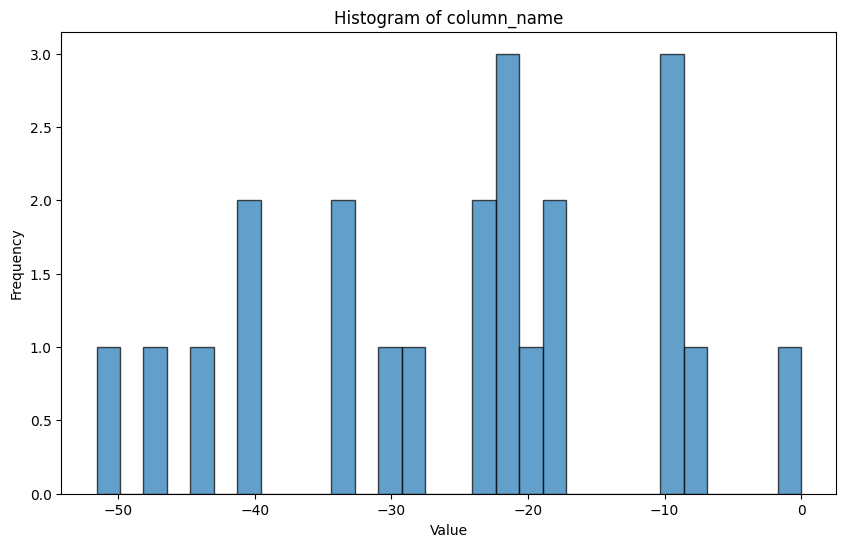

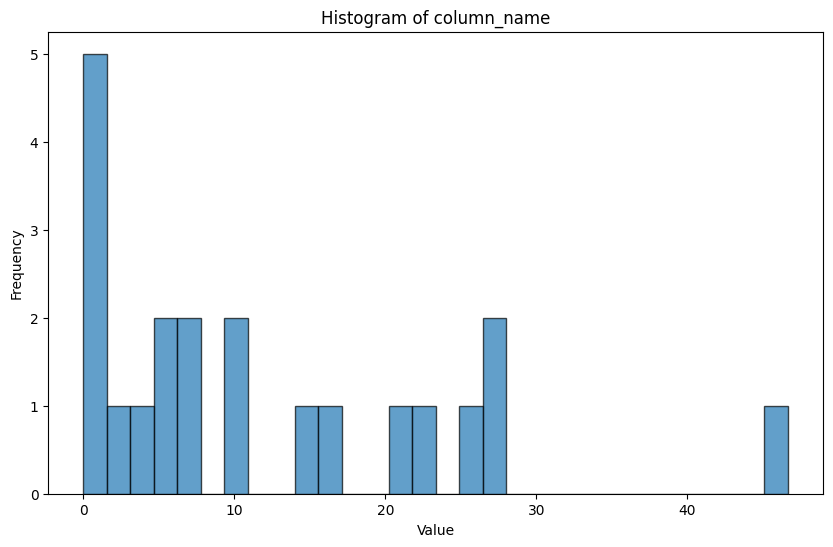

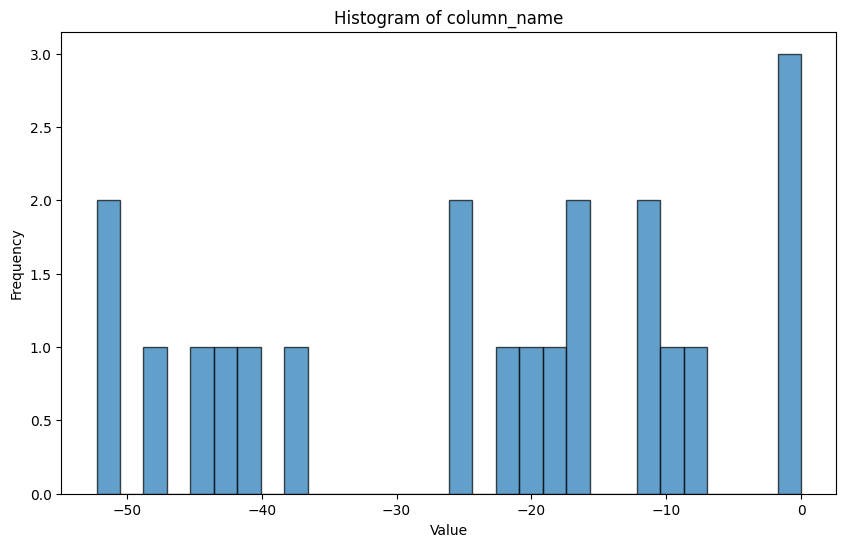

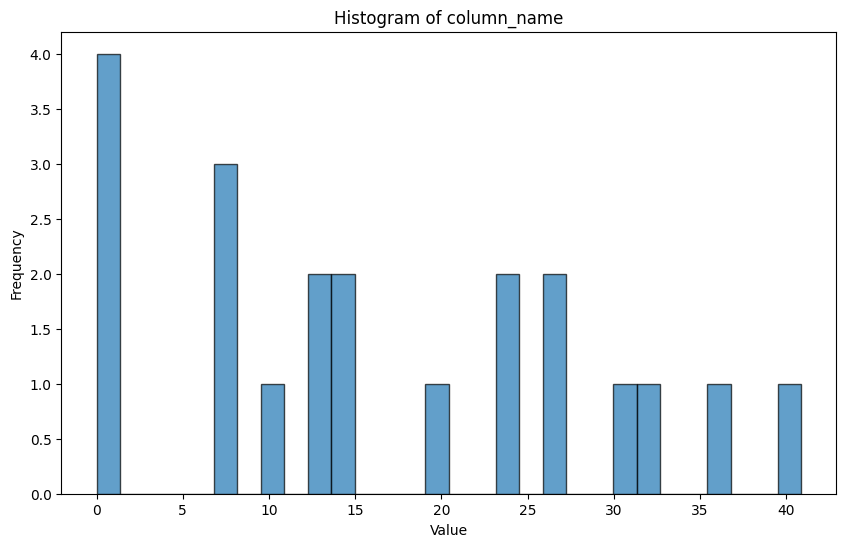

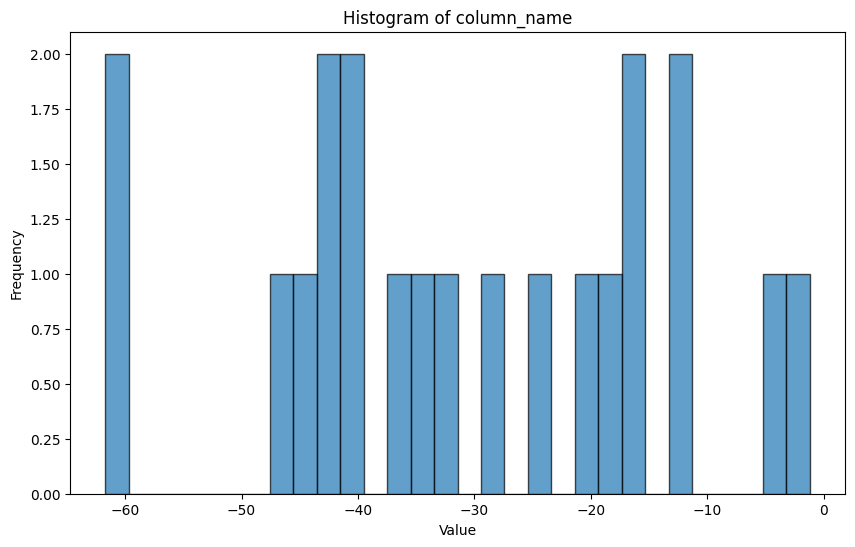

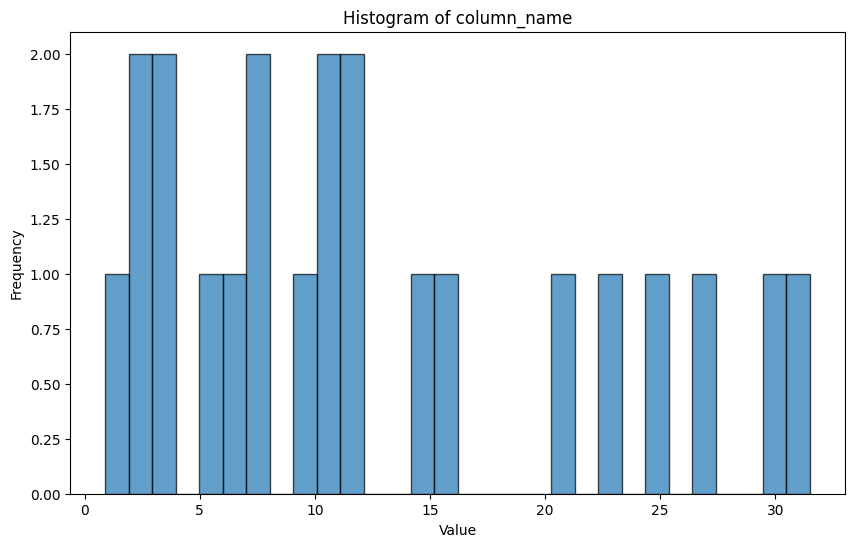

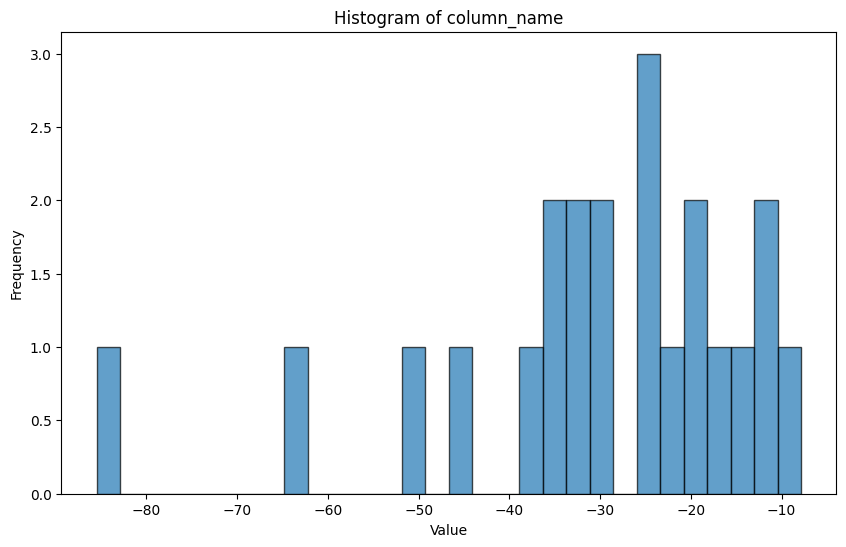

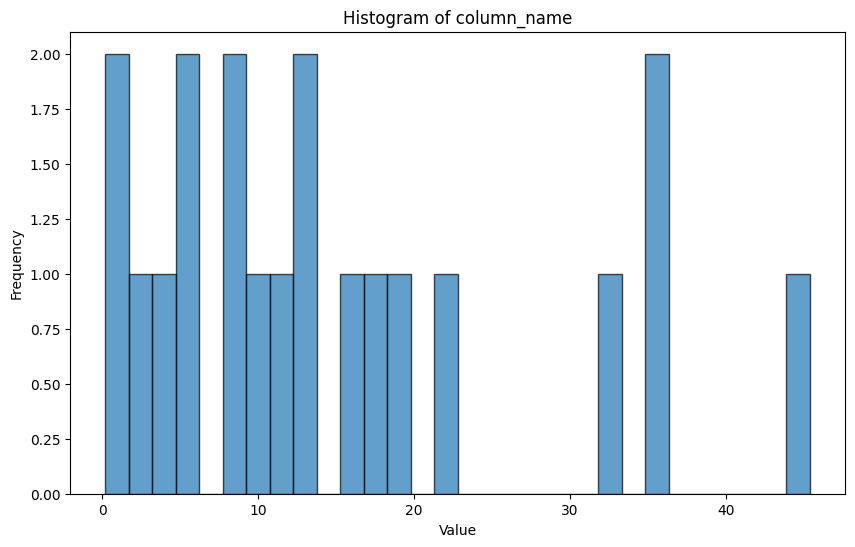

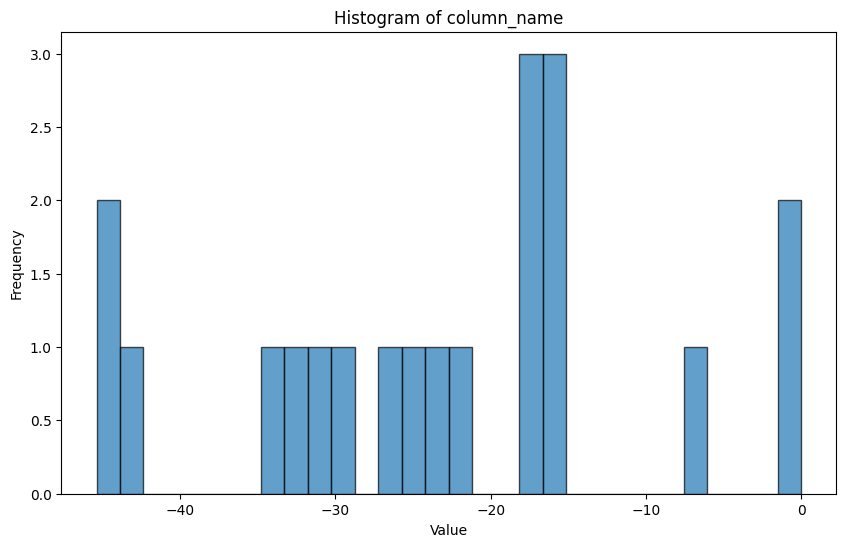

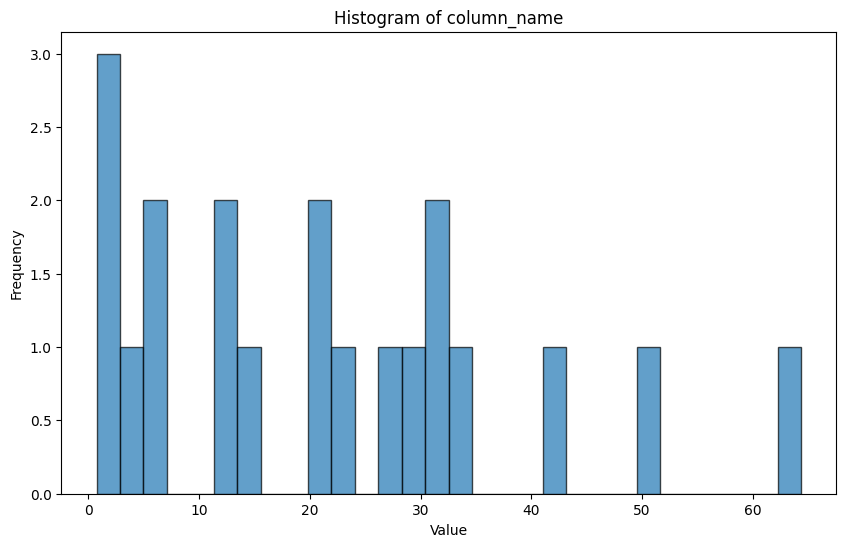

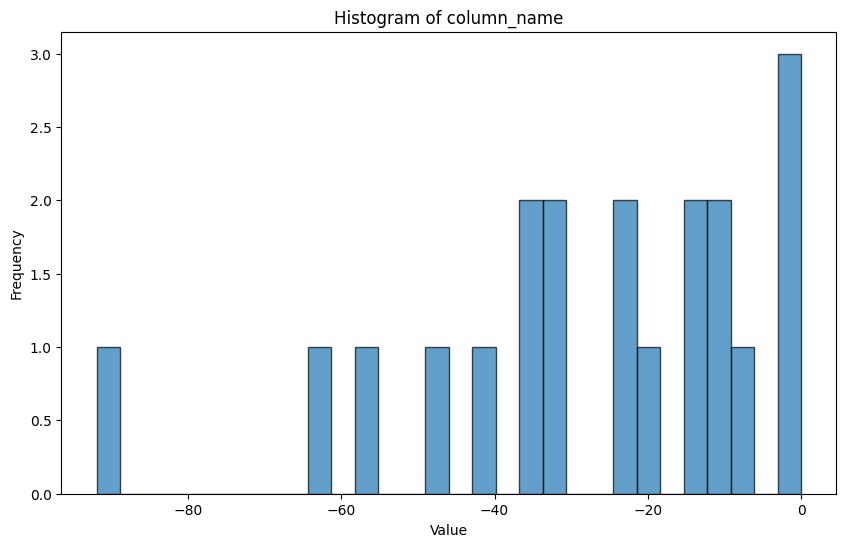

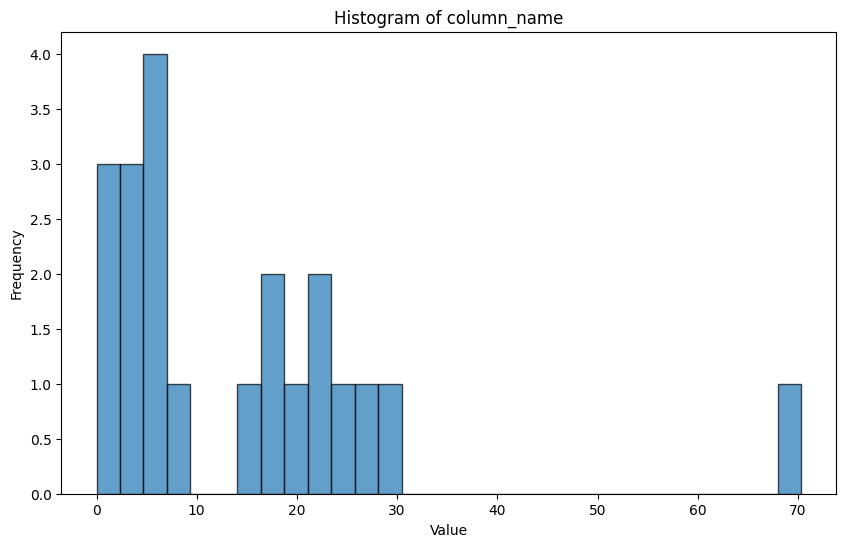

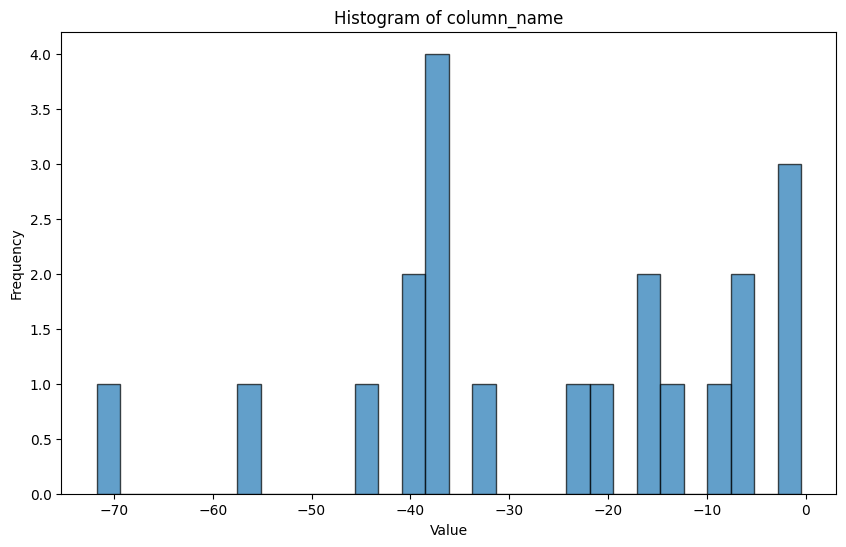

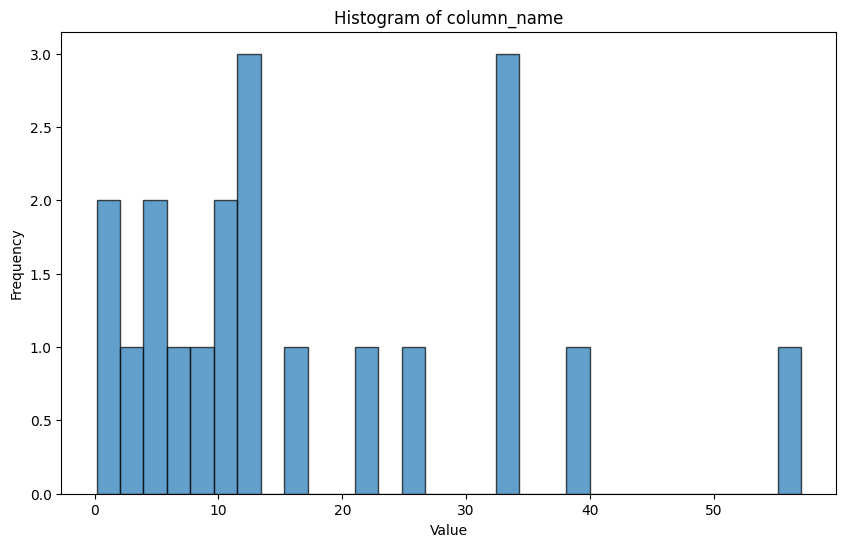

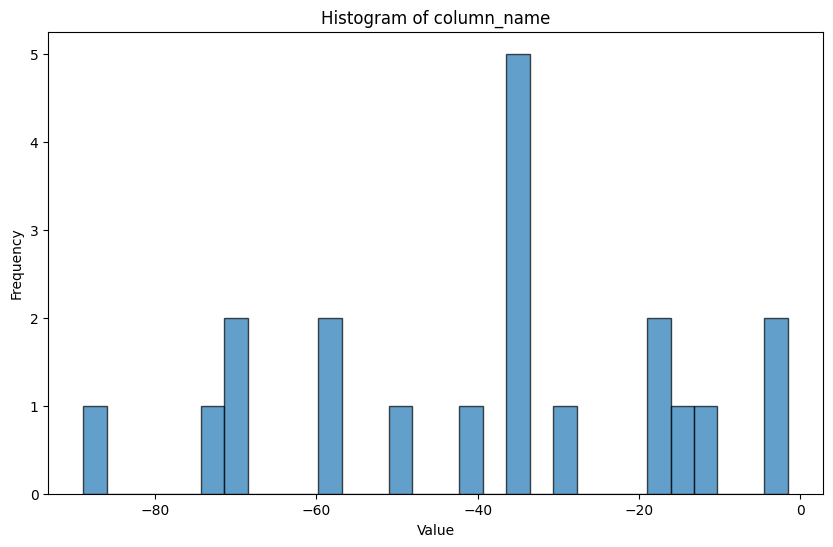

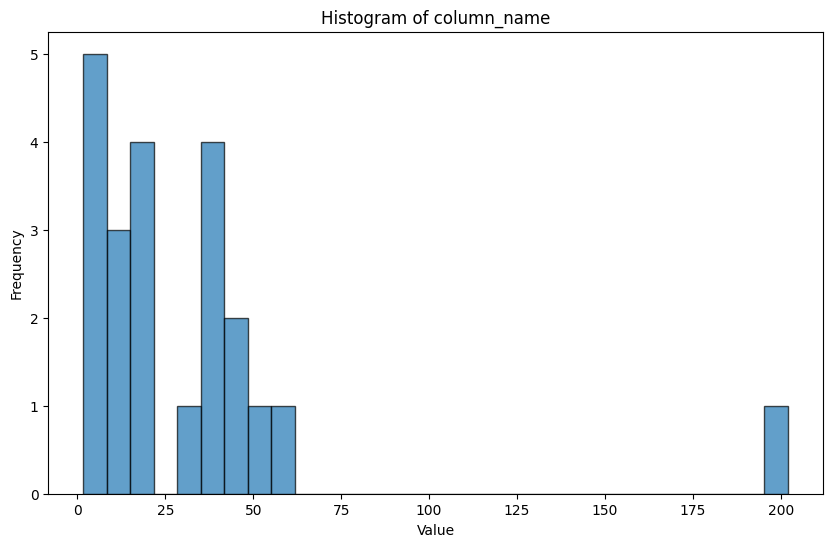

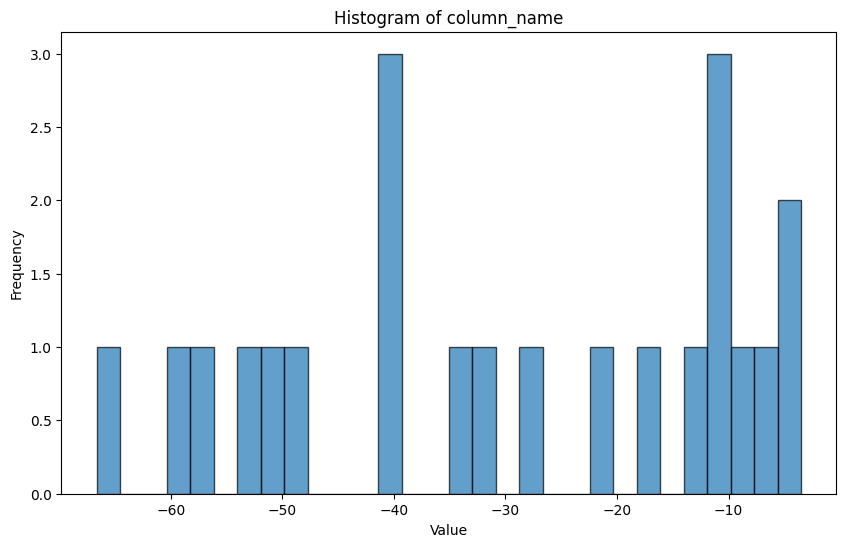

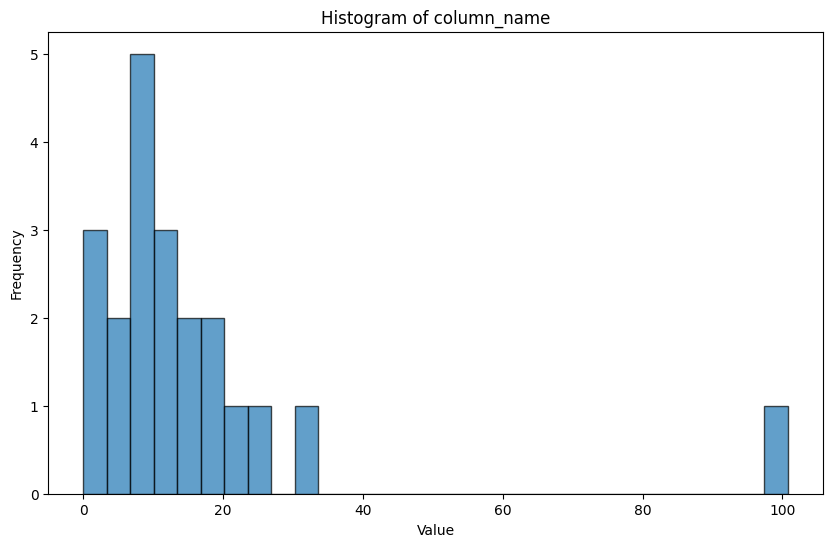

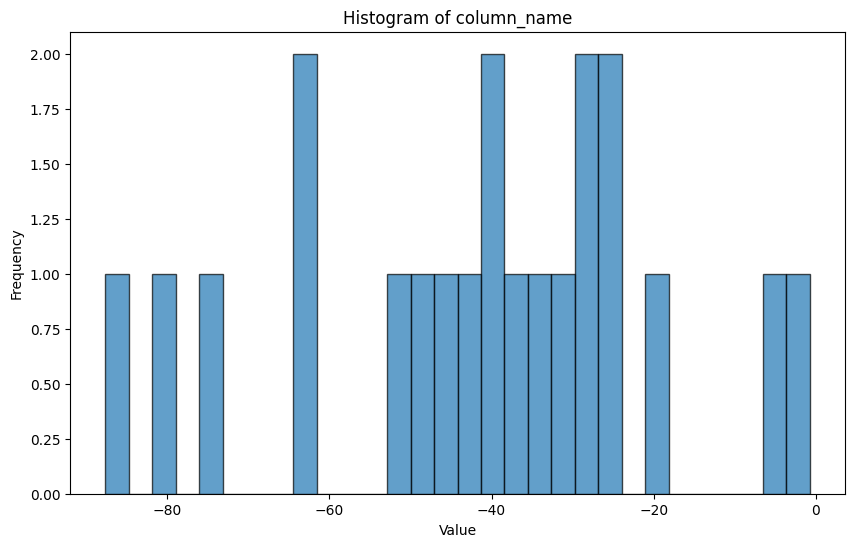

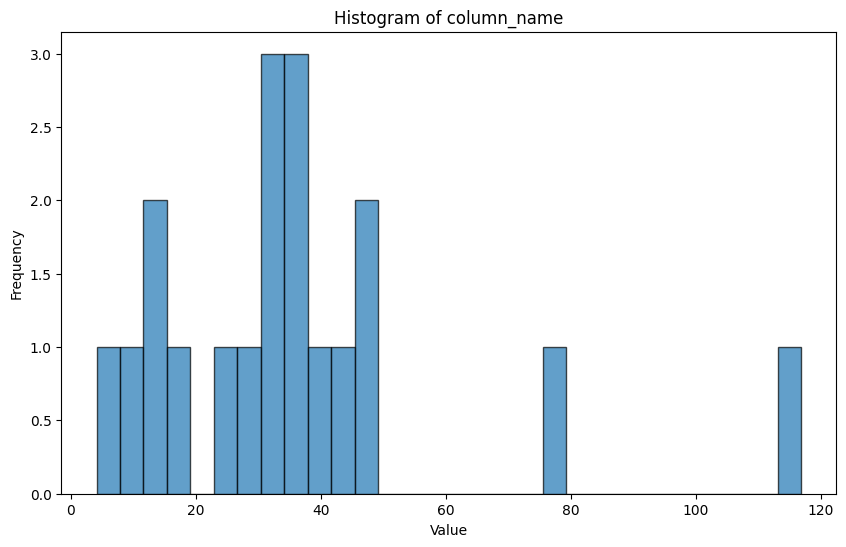

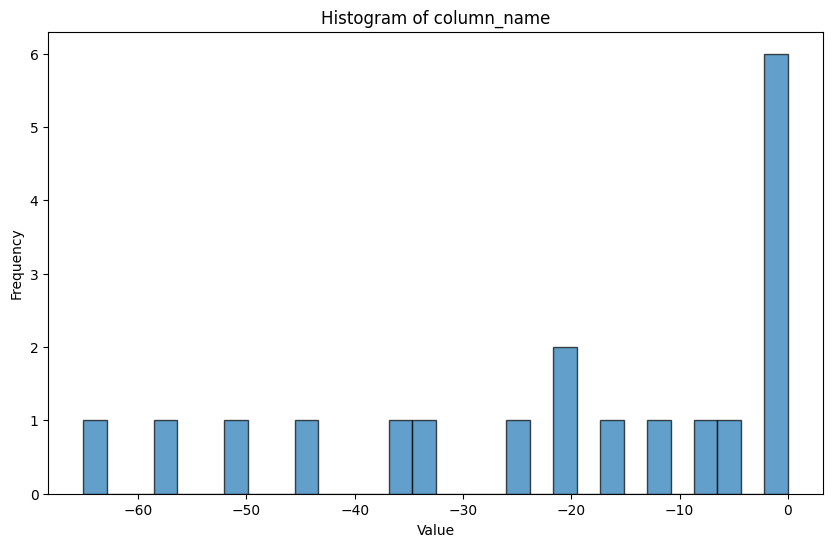

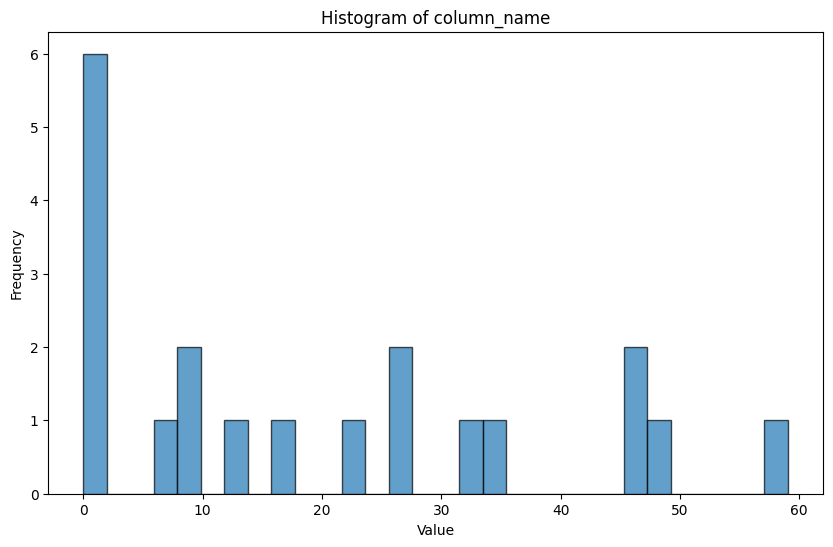

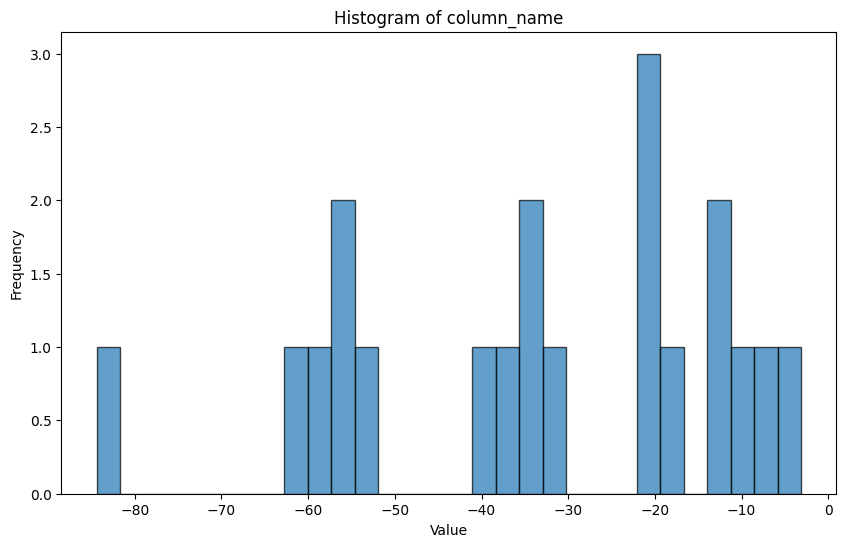

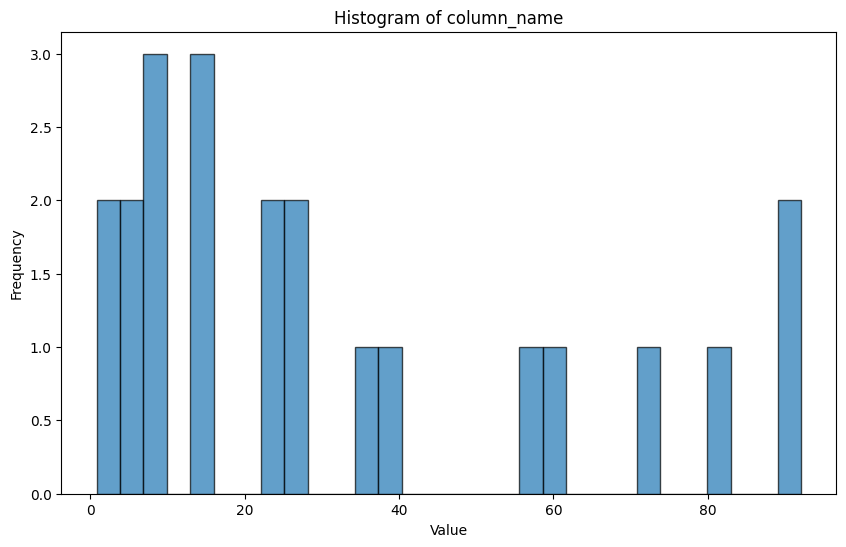

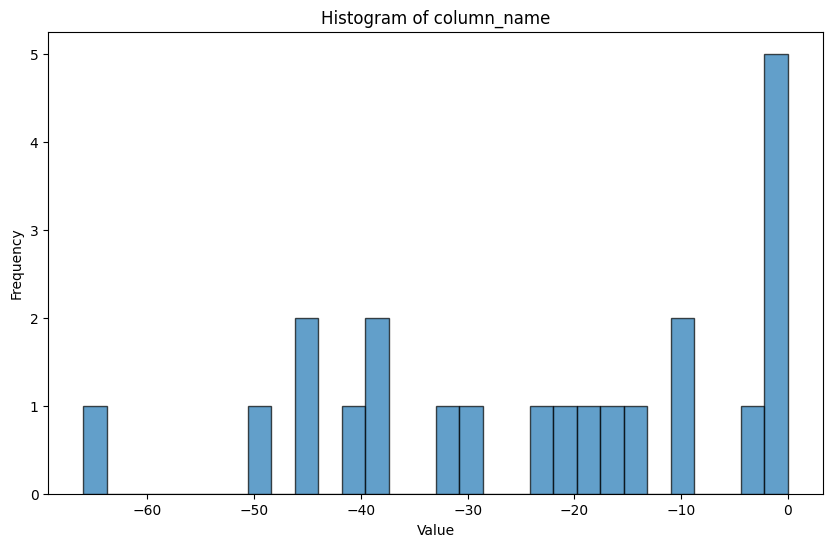

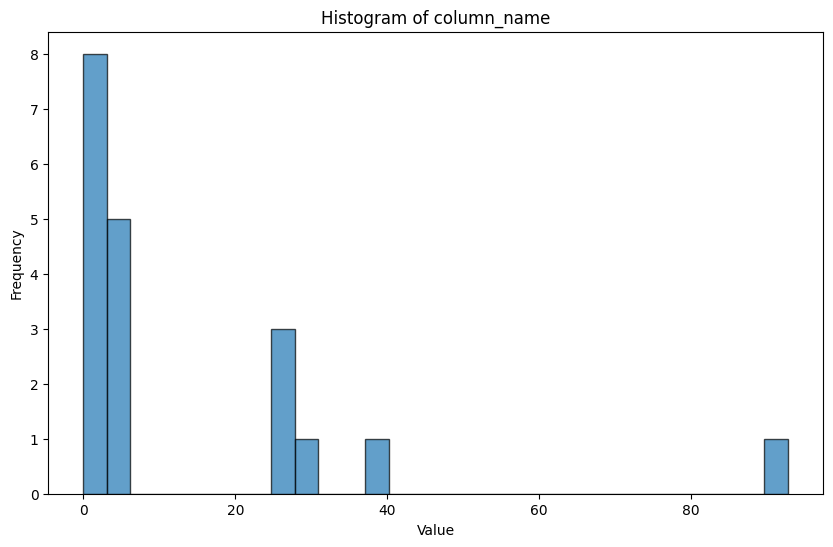

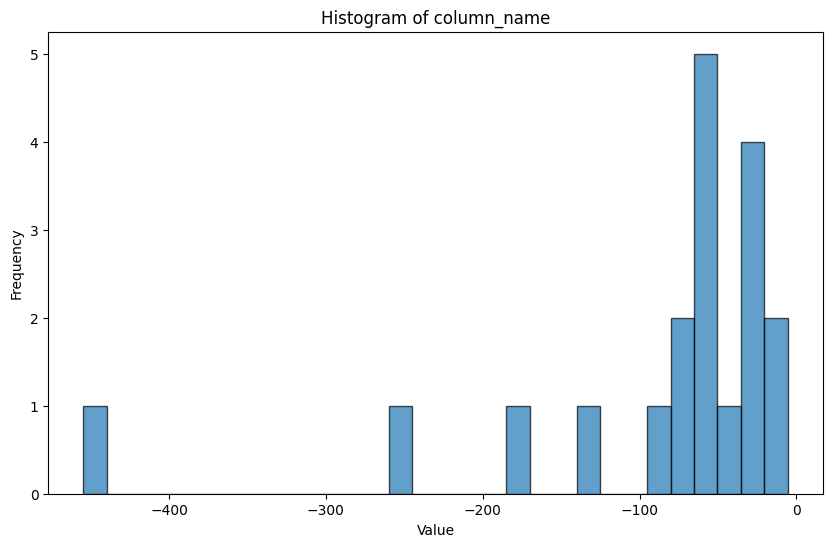

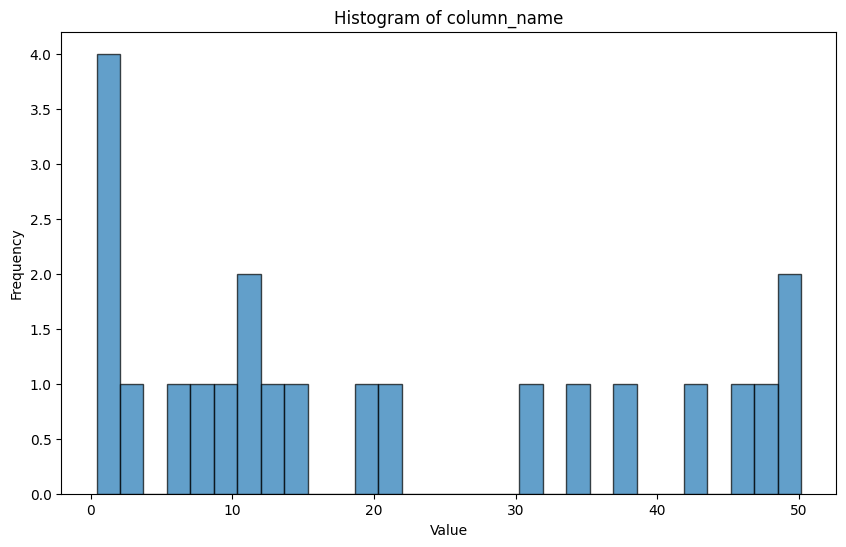

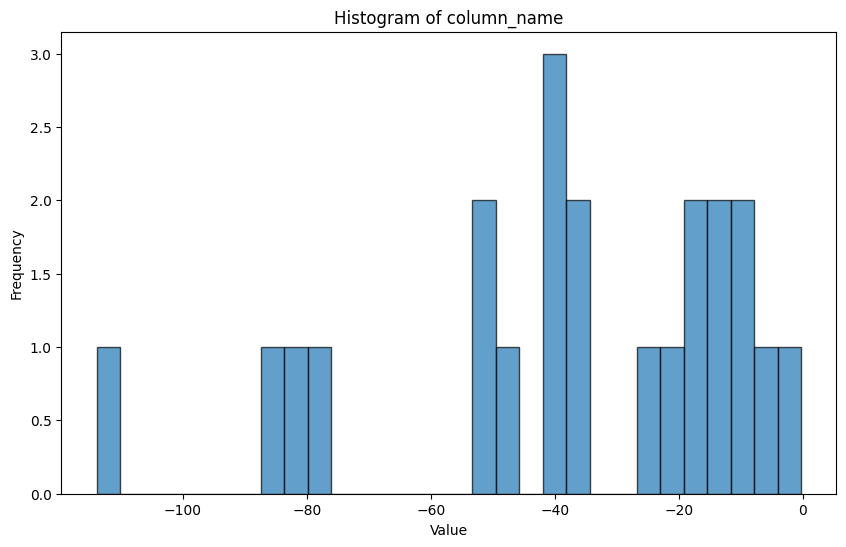

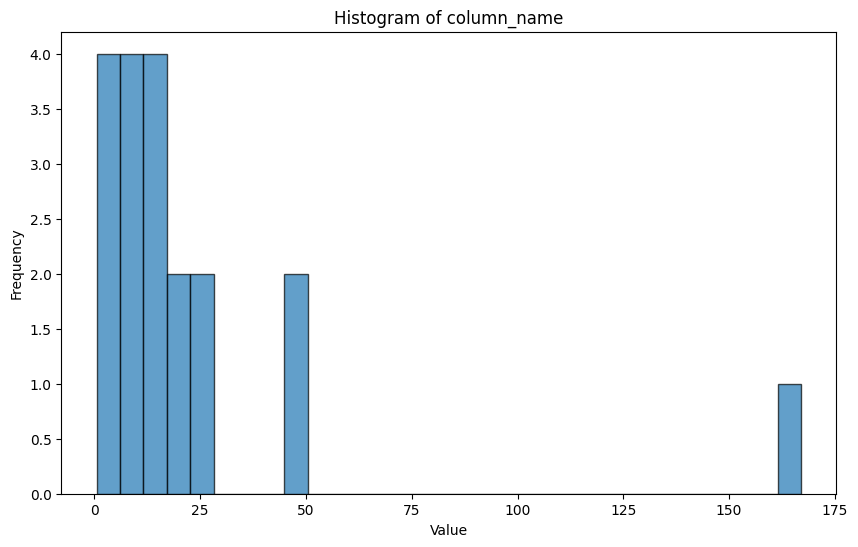

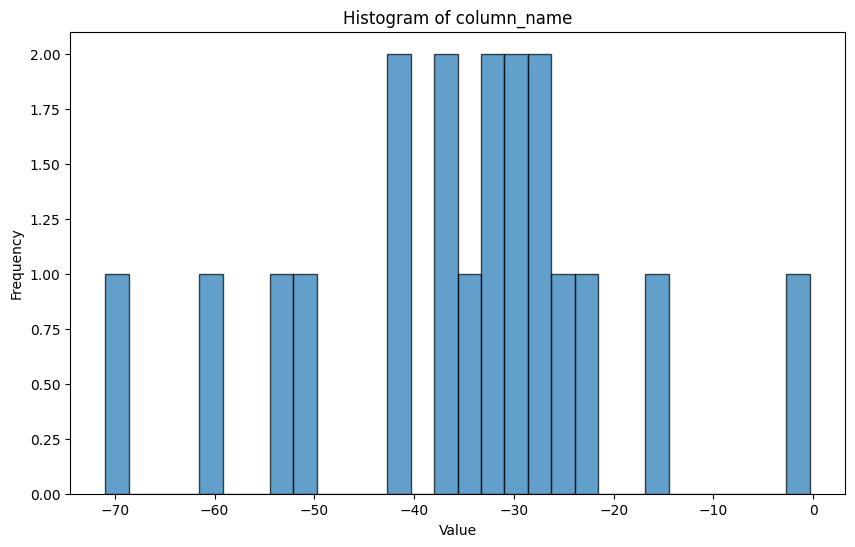

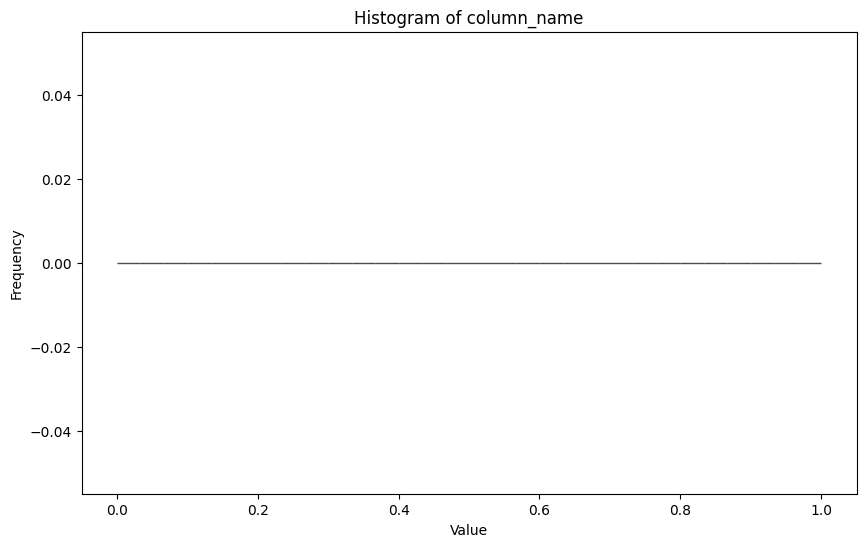

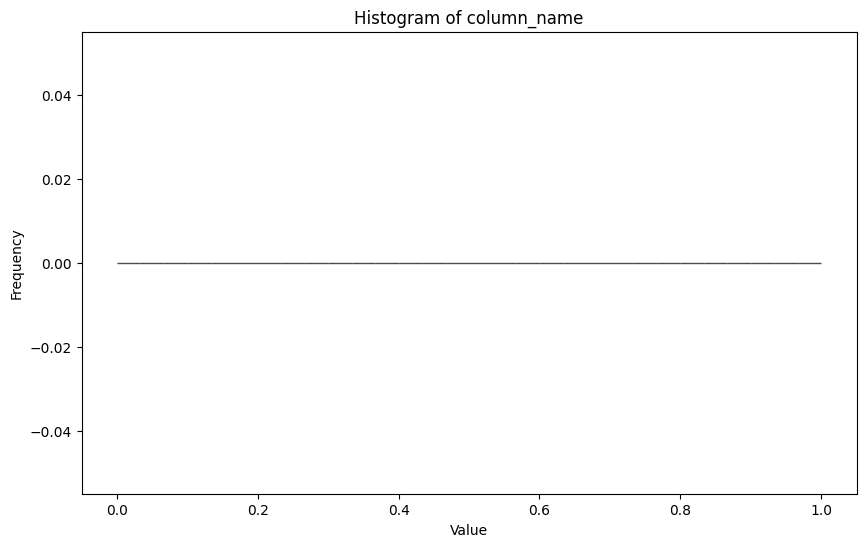

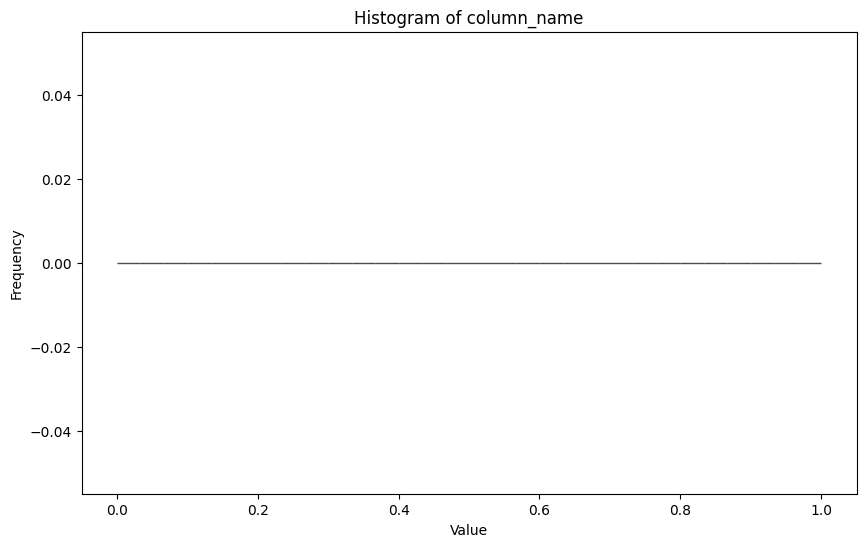

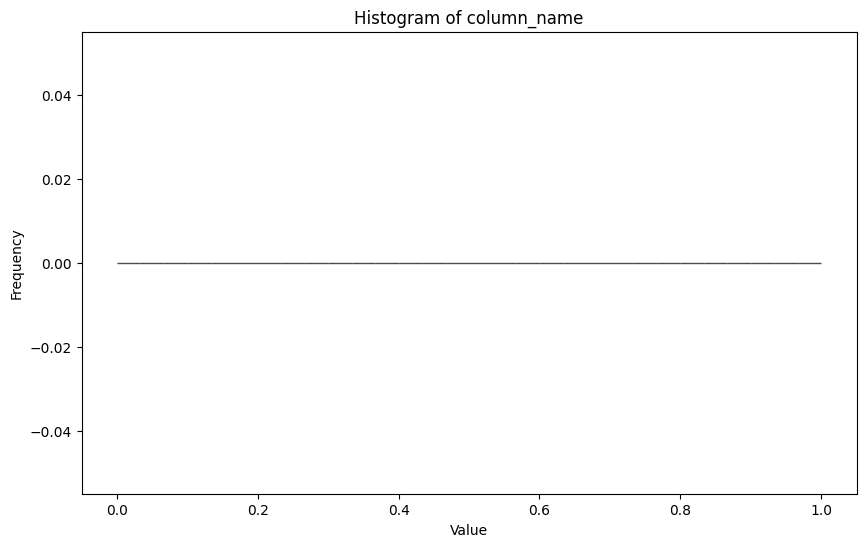

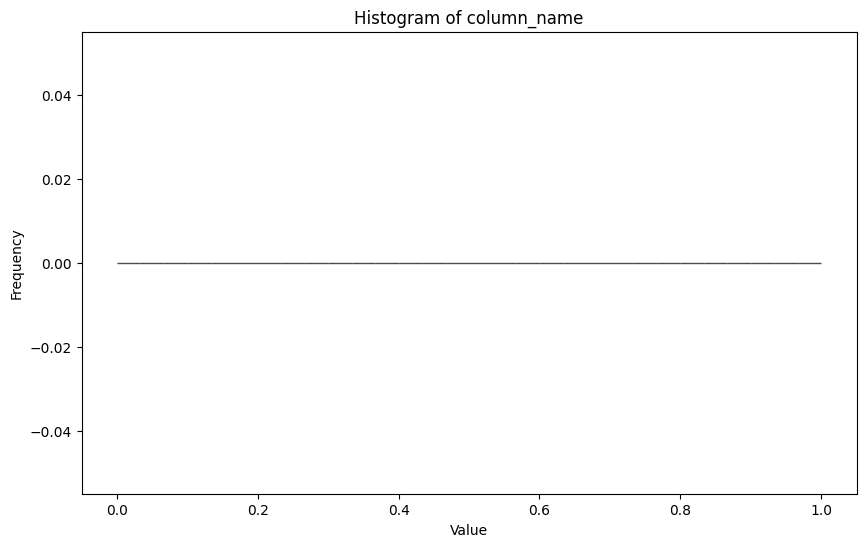

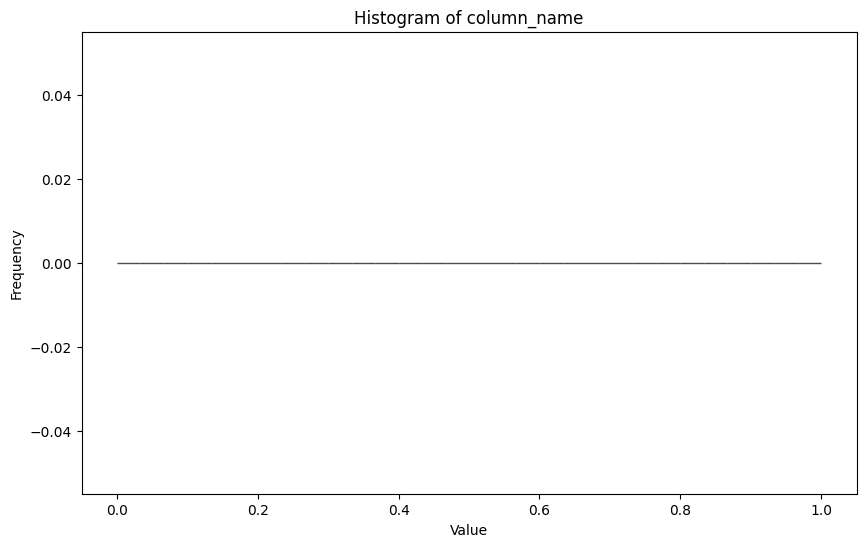

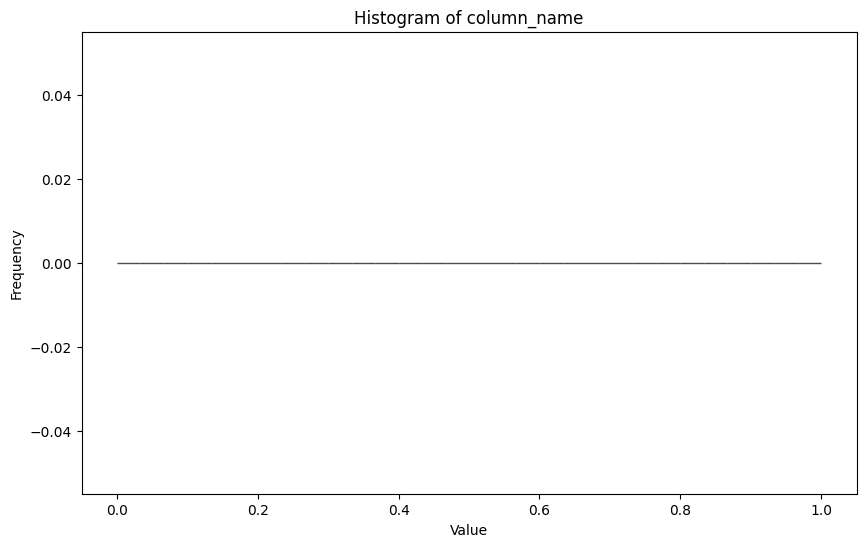

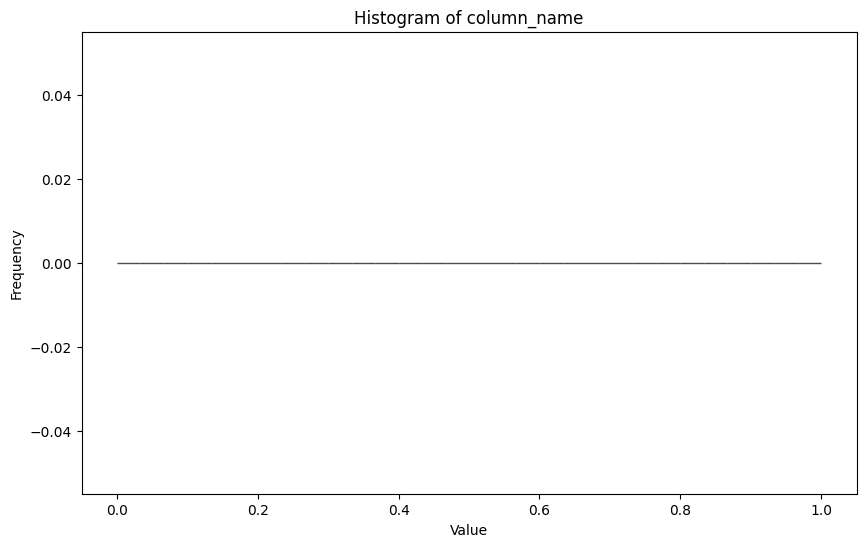

In [88]:
import matplotlib.pyplot as plt

for year in range(2021, 2025):
    for month in range(1, 13):
        # Plot candlestick chart
        directory_path = f"{os.getcwd()}/data_distribution/{str(year)}/{str(month)}"
        if not os.path.exists(directory_path):
            os.makedirs(directory_path)        

        for column in ['high-open','low-open']:
            # Replace 'column_name' with your numeric column
            plt.figure(figsize=(10, 6))
            plt.hist(monthly_data[f'{year}_{month}'][column], bins=30, edgecolor='k', alpha=0.7)
            plt.title('Histogram of column_name')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            plt.savefig(f'{directory_path}/histogram_{column}.jpg', format='jpg', dpi=500)